<a href="https://colab.research.google.com/github/MillionHappa/Spark/blob/main/Spark%2B_%E6%8E%A1%E7%94%A8%E8%AA%B2%E9%A1%8C_2_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Flip + Crop+Rotation (15)

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),          # Adds slight spatial jitter
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  # CIFAR-10の平均
                         std=[0.2023, 0.1994, 0.2010])   # CIFAR-10の標準偏差
])


val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  # CIFAR-10の平均
                         std=[0.2023, 0.1994, 0.2010])   # CIFAR-10の標準偏差
])

raw_dataset =datasets.CIFAR10(root="./data", train=False, download=False, transform=None)
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
validation_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

In [ ]:
names = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
data_iter = iter(train_dataloader)
imgs, labels = next(data_iter)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

In [ ]:
num_epochs=20
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_acc = 0.0

    for imgs, labels in train_dataloader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float()).item()

    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)

#validation
    model.eval()
    y_true, y_pred, y_score = [], [], []
    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = model(val_imgs)

        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc += torch.mean(val_pred.eq(val_labels).float()).item()

        probs = F.softmax(val_output, dim=1).cpu().detach().numpy()
        preds = np.argmax(probs, axis=1)

        y_true.extend(val_labels.cpu().numpy())
        y_pred.extend(preds)
        y_score.extend(probs)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_score = np.array(y_score)

    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)

    print("epoch: {}, loss: {}, acc: {}, val loss: {}, val acc: {}".format(epoch, running_loss, running_acc, val_running_loss, val_running_acc))

acc = accuracy_score(y_true, y_pred)
recall_macro = recall_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy       : {acc:.4f}')
print(f'Precision (macro): {precision_macro:.4f}')
print(f'Recall (macro)   : {recall_macro:.4f}')
print(f'F1 Score (macro): {f1_macro:.4f}')

epoch: 0, loss: 0.8536941999723267, acc: 0.6997760716570698, val loss: 0.3457482947756688, val acc: 0.880591054313099
epoch: 1, loss: 0.40321635486354296, acc: 0.861024472168906, val loss: 0.25520408804567096, val acc: 0.9160343450479234
epoch: 2, loss: 0.3104499613214344, acc: 0.8919945617402432, val loss: 0.23660184905682793, val acc: 0.9212260383386581
epoch: 3, loss: 0.25378568330690293, acc: 0.9125879718490083, val loss: 0.21671709829506974, val acc: 0.928214856230032
epoch: 4, loss: 0.21673100333308096, acc: 0.9250839731285988, val loss: 0.18923942337687405, val acc: 0.9362020766773163
epoch: 5, loss: 0.1878854084023473, acc: 0.9348408509277031, val loss: 0.20544543553637667, val acc: 0.9328075079872205
epoch: 6, loss: 0.16519180820243087, acc: 0.9424184261036468, val loss: 0.18463688947040194, val acc: 0.9421924920127795
epoch: 7, loss: 0.1514772326504944, acc: 0.9462372040946897, val loss: 0.1875449907274161, val acc: 0.9404952076677316
epoch: 8, loss: 0.13694598259623578, acc:

Accuracy: 0.9509

Classification Report:
               precision    recall  f1-score   support

       plane     0.9422    0.9620    0.9520      1000
         car     0.9767    0.9630    0.9698      1000
        bird     0.9571    0.9360    0.9464      1000
         cat     0.8954    0.9070    0.9011      1000
        deer     0.9675    0.9540    0.9607      1000
         dog     0.9142    0.9060    0.9101      1000
        frog     0.9740    0.9740    0.9740      1000
       horse     0.9699    0.9670    0.9685      1000
        ship     0.9652    0.9710    0.9681      1000
       truck     0.9481    0.9690    0.9585      1000

    accuracy                         0.9509     10000
   macro avg     0.9510    0.9509    0.9509     10000
weighted avg     0.9510    0.9509    0.9509     10000



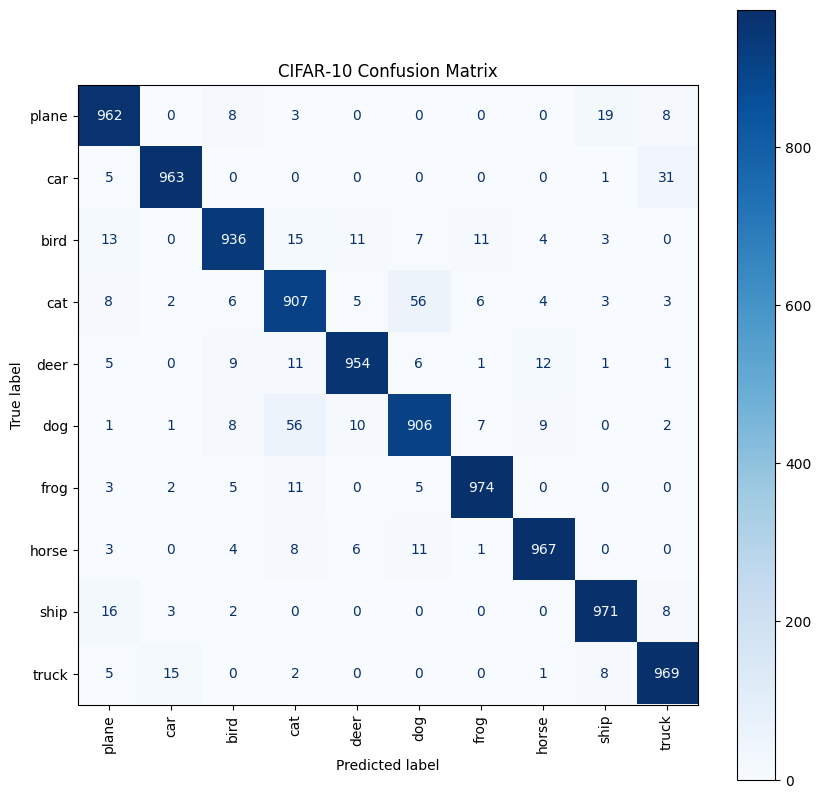

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# Classification report (Precision／Recall／F1)
print("\nClassification Report:\n",
      classification_report(y_true, y_pred, target_names=names, digits=4))

# 混同行列の計算と可視化
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title("CIFAR‑10 Confusion Matrix")
plt.show()


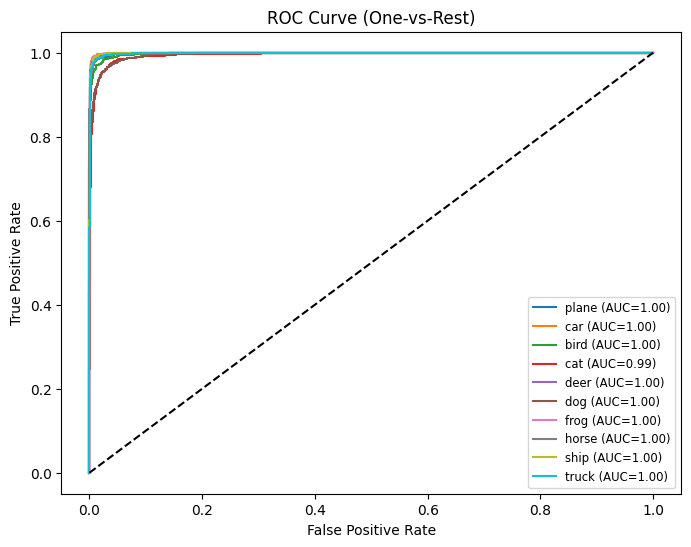

In [ ]:
# y_true を one-hot 表現に変換
y_true_bin = label_binarize(y_true, classes=list(range(10)))

# ROC 曲線・AUC
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_score[:, i])

# プロット
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{names[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right', fontsize='small')
plt.show()

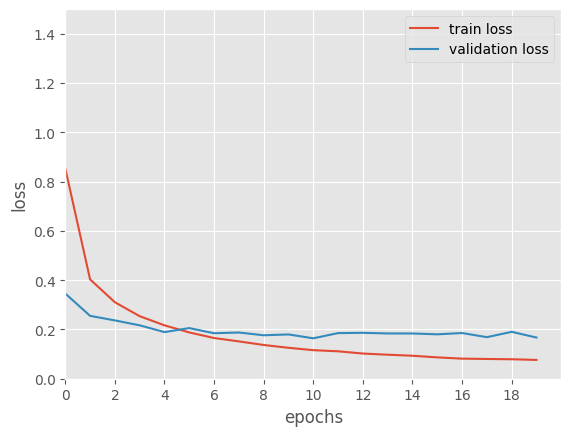

In [ ]:
plt.style.use("ggplot")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim(0,20)
plt.ylim(0,1.5)
plt.xticks(range(0, 19, 2))
plt.legend()

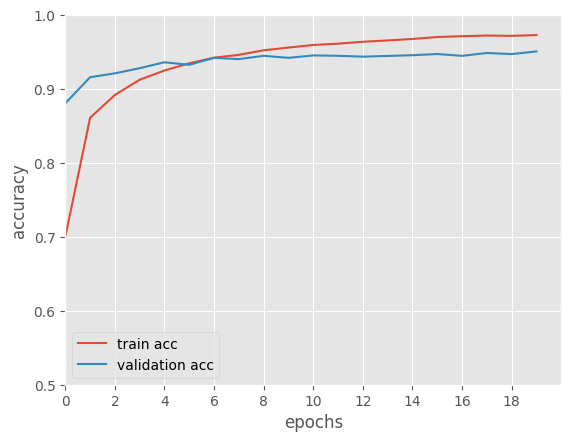

In [ ]:
plt.plot(accs, label="train acc")
plt.plot(val_accs, label="validation acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xlim(0,20)
plt.ylim(0.5,1)
plt.xticks(range(0, 19, 2))
plt.legend()

##Flip + Crop + Rotation + Autocontrast

In [ ]:
from PIL import ImageOps

class AutoContrastTransform:
    def __call__(self, img):
        return ImageOps.autocontrast(img)

In [ ]:
train_transform = transforms.Compose([
    AutoContrastTransform(),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2023, 0.1994, 0.2010])
])


val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  # CIFAR-10の平均
                         std=[0.2023, 0.1994, 0.2010])   # CIFAR-10の標準偏差
])

raw_dataset =datasets.CIFAR10(root="./data", train=False, download=False, transform=None)
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
validation_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

In [ ]:
names = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
data_iter = iter(train_dataloader)
imgs, labels = next(data_iter)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

In [ ]:
num_epochs=20
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_acc = 0.0

    for imgs, labels in train_dataloader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float()).item()

    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)

#validation
    model.eval()
    y_true, y_pred, y_score = [], [], []
    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = model(val_imgs)

        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc += torch.mean(val_pred.eq(val_labels).float()).item()

        probs = F.softmax(val_output, dim=1).cpu().detach().numpy()
        preds = np.argmax(probs, axis=1)

        y_true.extend(val_labels.cpu().numpy())
        y_pred.extend(preds)
        y_score.extend(probs)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_score = np.array(y_score)

    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)

    print("epoch: {}, loss: {}, acc: {}, val loss: {}, val acc: {}".format(epoch, running_loss, running_acc, val_running_loss, val_running_acc))

acc = accuracy_score(y_true, y_pred)
recall_macro = recall_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy       : {acc:.4f}')
print(f'Precision (macro): {precision_macro:.4f}')
print(f'Recall (macro)   : {recall_macro:.4f}')
print(f'F1 Score (macro): {f1_macro:.4f}')

epoch: 0, loss: 0.8455452571598597, acc: 0.7027351247600768, val loss: 0.3658536898727996, val acc: 0.8755990415335463
epoch: 1, loss: 0.38527235633056667, acc: 0.8673624440179143, val loss: 0.2847625038946589, val acc: 0.9029552715654952
epoch: 2, loss: 0.28531174715286595, acc: 0.9028111004478567, val loss: 0.2299695090828136, val acc: 0.922823482428115
epoch: 3, loss: 0.2300944107197945, acc: 0.9197256877799105, val loss: 0.2635633302287172, val acc: 0.9132388178913738
epoch: 4, loss: 0.1980019171310497, acc: 0.9313419705694178, val loss: 0.21221069597933714, val acc: 0.9309105431309904
epoch: 5, loss: 0.17145167372111406, acc: 0.9406589891234804, val loss: 0.21487228516132212, val acc: 0.930111821086262
epoch: 6, loss: 0.15363534836465598, acc: 0.9460972488803583, val loss: 0.2364581932980246, val acc: 0.9265175718849841
epoch: 7, loss: 0.13228515562078821, acc: 0.9544145873320538, val loss: 0.19136846119972367, val acc: 0.9391972843450479
epoch: 8, loss: 0.12043913938680108, acc: 

Accuracy: 0.9434

Classification Report:
               precision    recall  f1-score   support

       plane     0.9710    0.9380    0.9542      1000
         car     0.9745    0.9560    0.9652      1000
        bird     0.9367    0.9470    0.9418      1000
         cat     0.8528    0.9040    0.8777      1000
        deer     0.9662    0.9440    0.9550      1000
         dog     0.9055    0.8820    0.8936      1000
        frog     0.9707    0.9620    0.9663      1000
       horse     0.9686    0.9560    0.9623      1000
        ship     0.9486    0.9780    0.9631      1000
       truck     0.9462    0.9670    0.9565      1000

    accuracy                         0.9434     10000
   macro avg     0.9441    0.9434    0.9436     10000
weighted avg     0.9441    0.9434    0.9436     10000



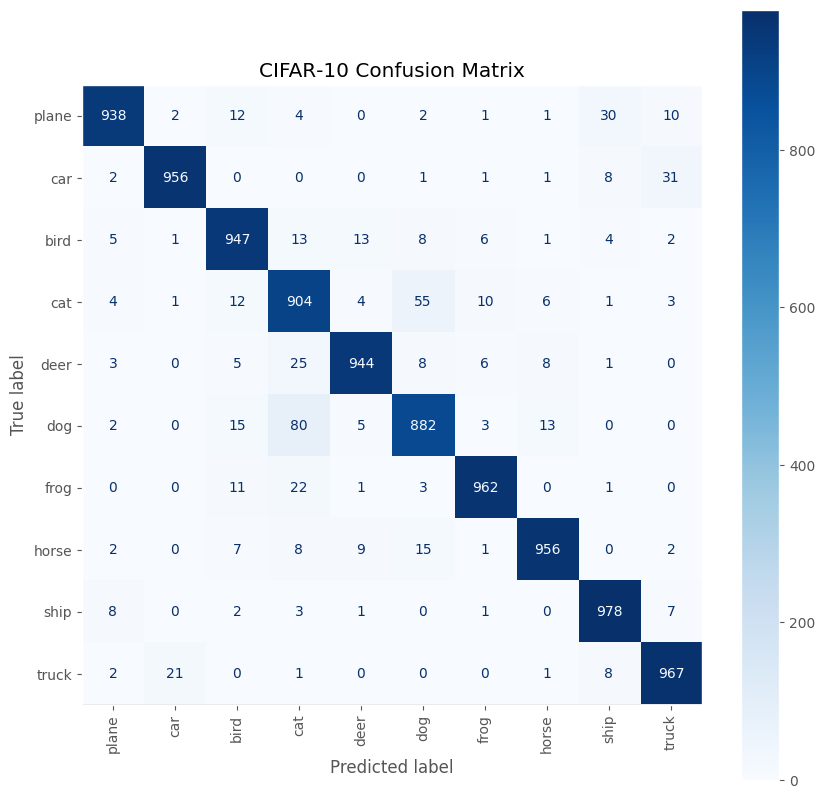

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# Classification report (Precision／Recall／F1)
print("\nClassification Report:\n",
      classification_report(y_true, y_pred, target_names=names, digits=4))

# 混同行列の計算と可視化
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title("CIFAR‑10 Confusion Matrix")
plt.grid(False)
plt.show()


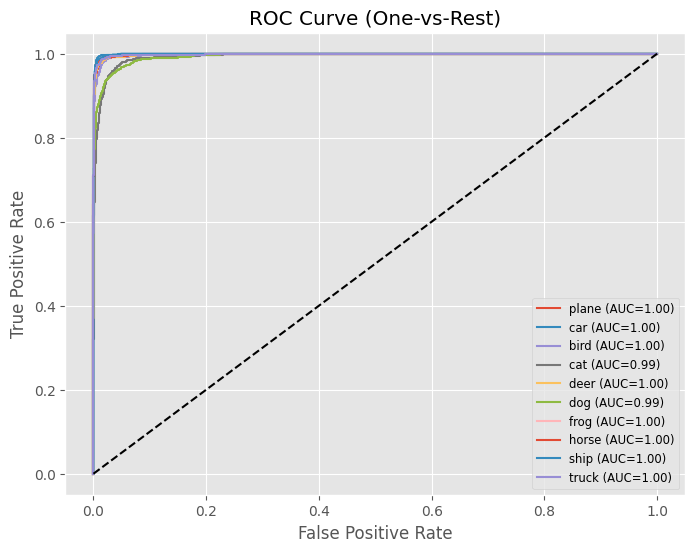

In [ ]:
# y_true を one-hot 表現に変換
y_true_bin = label_binarize(y_true, classes=list(range(10)))

# ROC 曲線・AUC
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_score[:, i])

# プロット
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{names[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right', fontsize='small')
plt.show()

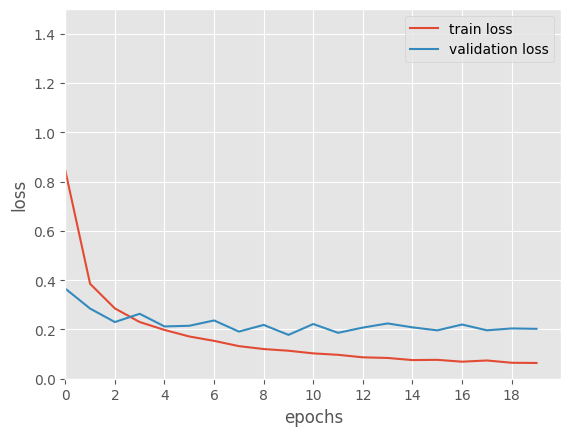

In [ ]:
plt.style.use("ggplot")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim(0,20)
plt.ylim(0,1.5)
plt.xticks(range(0, 19, 2))
plt.legend()

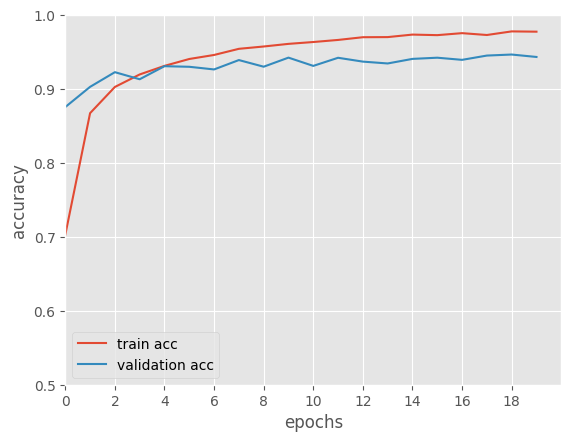

In [ ]:
plt.plot(accs, label="train acc")
plt.plot(val_accs, label="validation acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xlim(0,20)
plt.ylim(0.5,1)
plt.xticks(range(0, 19, 2))
plt.legend()

## Grayscale, sharpness, randomequalize, randomaffine

In [ ]:
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # 色依存を除去
    transforms.RandomAdjustSharpness(sharpness_factor=2),  # エッジ強調
    transforms.RandomEqualize(),  # コントラスト調整
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1)),  # 幾何変換
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

raw_dataset =datasets.CIFAR10(root="./data", train=False, download=True, transform=None)
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
validation_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

100%|██████████| 170M/170M [00:04<00:00, 42.1MB/s]


In [ ]:
names = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
data_iter = iter(train_dataloader)
imgs, labels = next(data_iter)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

In [ ]:
num_epochs=20
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_acc = 0.0

    for imgs, labels in train_dataloader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float()).item()

    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)

#validation
    model.eval()
    y_true, y_pred, y_score = [], [], []
    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = model(val_imgs)

        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc += torch.mean(val_pred.eq(val_labels).float()).item()

        probs = F.softmax(val_output, dim=1).cpu().detach().numpy()
        preds = np.argmax(probs, axis=1)

        y_true.extend(val_labels.cpu().numpy())
        y_pred.extend(preds)
        y_score.extend(probs)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_score = np.array(y_score)

    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)

    print("epoch: {}, loss: {}, acc: {}, val loss: {}, val acc: {}".format(epoch, running_loss, running_acc, val_running_loss, val_running_acc))

acc = accuracy_score(y_true, y_pred)
recall_macro = recall_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy       : {acc:.4f}')
print(f'Precision (macro): {precision_macro:.4f}')
print(f'Recall (macro)   : {recall_macro:.4f}')
print(f'F1 Score (macro): {f1_macro:.4f}')

epoch: 0, loss: 0.9028948672349378, acc: 0.6875199936020473, val loss: 0.47464056244006936, val acc: 0.8329672523961661
epoch: 1, loss: 0.5202029204128342, acc: 0.8203774792066538, val loss: 0.35618220167323805, val acc: 0.8746006389776357
epoch: 2, loss: 0.43539580120749755, acc: 0.8504278630838131, val loss: 0.30453153409230443, val acc: 0.8960662939297125
epoch: 3, loss: 0.3791407527651111, acc: 0.8692418426103646, val loss: 0.2947516509543021, val acc: 0.9018570287539937
epoch: 4, loss: 0.34068592370118916, acc: 0.8823576455534229, val loss: 0.2920313362781994, val acc: 0.9001597444089456
epoch: 5, loss: 0.30886746683799715, acc: 0.8924344209852847, val loss: 0.2782265705267747, val acc: 0.90435303514377
epoch: 6, loss: 0.28386119540282645, acc: 0.9013715611004478, val loss: 0.266588392292563, val acc: 0.9100439297124601
epoch: 7, loss: 0.2609768374367204, acc: 0.9093090211132437, val loss: 0.2840616968118202, val acc: 0.90625
epoch: 8, loss: 0.24892968538092713, acc: 0.91446737044

Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

       plane     0.9591    0.9140    0.9360      1000
         car     0.9430    0.9760    0.9592      1000
        bird     0.8798    0.8930    0.8864      1000
         cat     0.8017    0.8690    0.8340      1000
        deer     0.9000    0.9090    0.9045      1000
         dog     0.9129    0.8490    0.8798      1000
        frog     0.9455    0.9360    0.9407      1000
       horse     0.9577    0.9510    0.9543      1000
        ship     0.9458    0.9770    0.9611      1000
       truck     0.9676    0.9260    0.9463      1000

    accuracy                         0.9200     10000
   macro avg     0.9213    0.9200    0.9202     10000
weighted avg     0.9213    0.9200    0.9202     10000



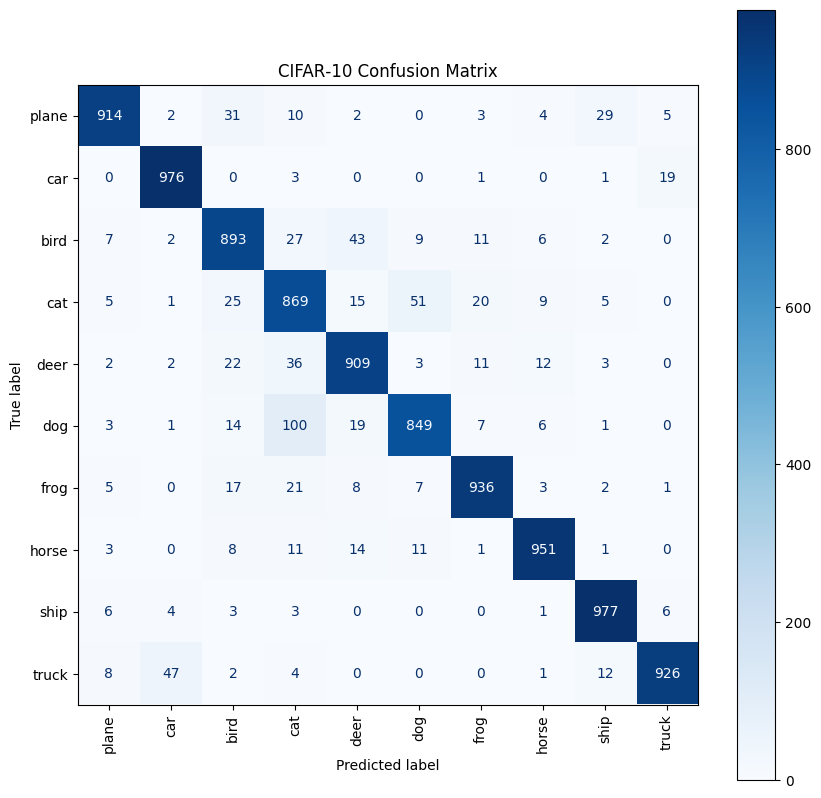

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# Classification report (Precision／Recall／F1)
print("\nClassification Report:\n",
      classification_report(y_true, y_pred, target_names=names, digits=4))

# 混同行列の計算と可視化
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title("CIFAR‑10 Confusion Matrix")
plt.show()


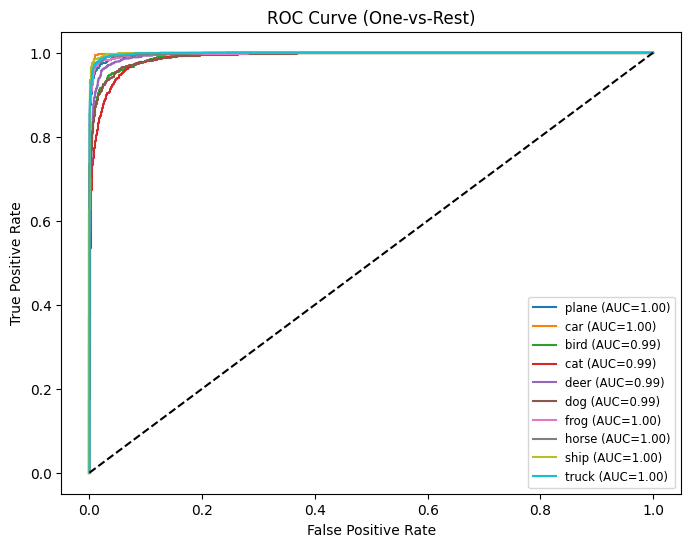

In [ ]:
# y_true を one-hot 表現に変換
y_true_bin = label_binarize(y_true, classes=list(range(10)))

# ROC 曲線・AUC
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_score[:, i])

# プロット
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{names[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right', fontsize='small')
plt.show()

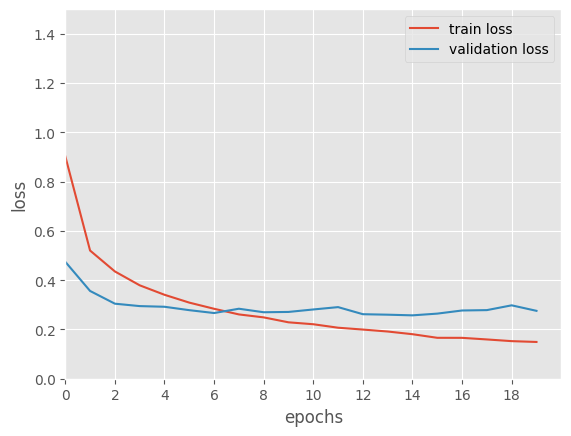

In [ ]:
plt.style.use("ggplot")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim(0,20)
plt.ylim(0,1.5)
plt.xticks(range(0, 19, 2))
plt.legend()

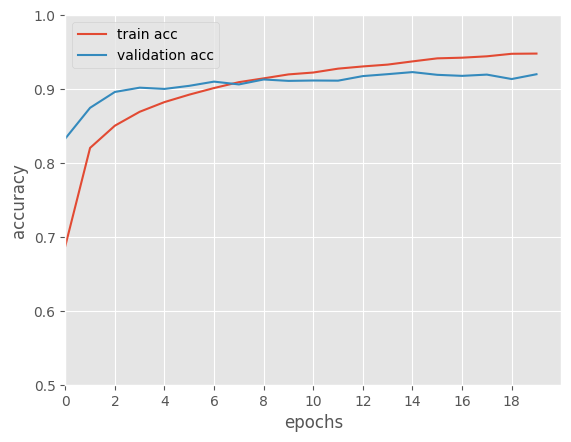

In [ ]:
plt.plot(accs, label="train acc")
plt.plot(val_accs, label="validation acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xlim(0,20)
plt.ylim(0.5,1)
plt.xticks(range(0, 19, 2))
plt.legend()

##Flip + Crop + Rotation + Gausian + randomerasing

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2023, 0.1994, 0.2010]),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0)
])


val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  # CIFAR-10の平均
                         std=[0.2023, 0.1994, 0.2010])   # CIFAR-10の標準偏差
])

raw_dataset =datasets.CIFAR10(root="./data", train=False, download=True, transform=None)
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
validation_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

100%|██████████| 170M/170M [00:13<00:00, 12.7MB/s]


In [ ]:
names = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
data_iter = iter(train_dataloader)
imgs, labels = next(data_iter)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)

In [ ]:
num_epochs=20
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_acc = 0.0

    for imgs, labels in train_dataloader:
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = model(imgs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        running_acc += torch.mean(pred.eq(labels).float()).item()

    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)

#validation
    model.eval()
    y_true, y_pred, y_score = [], [], []
    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = model(val_imgs)

        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc += torch.mean(val_pred.eq(val_labels).float()).item()

        probs = F.softmax(val_output, dim=1).cpu().detach().numpy()
        preds = np.argmax(probs, axis=1)

        y_true.extend(val_labels.cpu().numpy())
        y_pred.extend(preds)
        y_score.extend(probs)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_score = np.array(y_score)

    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)

    print("epoch: {}, loss: {}, acc: {}, val loss: {}, val acc: {}".format(epoch, running_loss, running_acc, val_running_loss, val_running_acc))

acc = accuracy_score(y_true, y_pred)
recall_macro = recall_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy       : {acc:.4f}')
print(f'Precision (macro): {precision_macro:.4f}')
print(f'Recall (macro)   : {recall_macro:.4f}')
print(f'F1 Score (macro): {f1_macro:.4f}')

epoch: 0, loss: 1.0361414434851857, acc: 0.6320577415227128, val loss: 0.4539435278779021, val acc: 0.8519369009584664
epoch: 1, loss: 0.561561629233342, acc: 0.805602207293666, val loss: 0.29701879315863783, val acc: 0.8997603833865815
epoch: 2, loss: 0.45005981636520237, acc: 0.8446896992962252, val loss: 0.2550851017260513, val acc: 0.9140375399361023
epoch: 3, loss: 0.392181392766235, acc: 0.8642634357005758, val loss: 0.21322655302886004, val acc: 0.9270167731629393
epoch: 4, loss: 0.35190777379545124, acc: 0.8775591810620601, val loss: 0.19517423887513935, val acc: 0.9343051118210862
epoch: 5, loss: 0.32257277896998404, acc: 0.8862763915547025, val loss: 0.17752708014868462, val acc: 0.9406948881789138
epoch: 6, loss: 0.29368281986633515, acc: 0.8974128278950736, val loss: 0.16312334862963174, val acc: 0.9439896166134185
epoch: 7, loss: 0.27365745506139133, acc: 0.9037707933461292, val loss: 0.18129112609117604, val acc: 0.9400958466453674
epoch: 8, loss: 0.25743230590650423, acc

Accuracy: 0.9474

Classification Report:
               precision    recall  f1-score   support

       plane     0.9588    0.9550    0.9569      1000
         car     0.9639    0.9870    0.9753      1000
        bird     0.9408    0.9370    0.9389      1000
         cat     0.8927    0.8900    0.8913      1000
        deer     0.9069    0.9740    0.9392      1000
         dog     0.9323    0.8810    0.9059      1000
        frog     0.9593    0.9670    0.9631      1000
       horse     0.9866    0.9580    0.9721      1000
        ship     0.9650    0.9650    0.9650      1000
       truck     0.9707    0.9600    0.9653      1000

    accuracy                         0.9474     10000
   macro avg     0.9477    0.9474    0.9473     10000
weighted avg     0.9477    0.9474    0.9473     10000



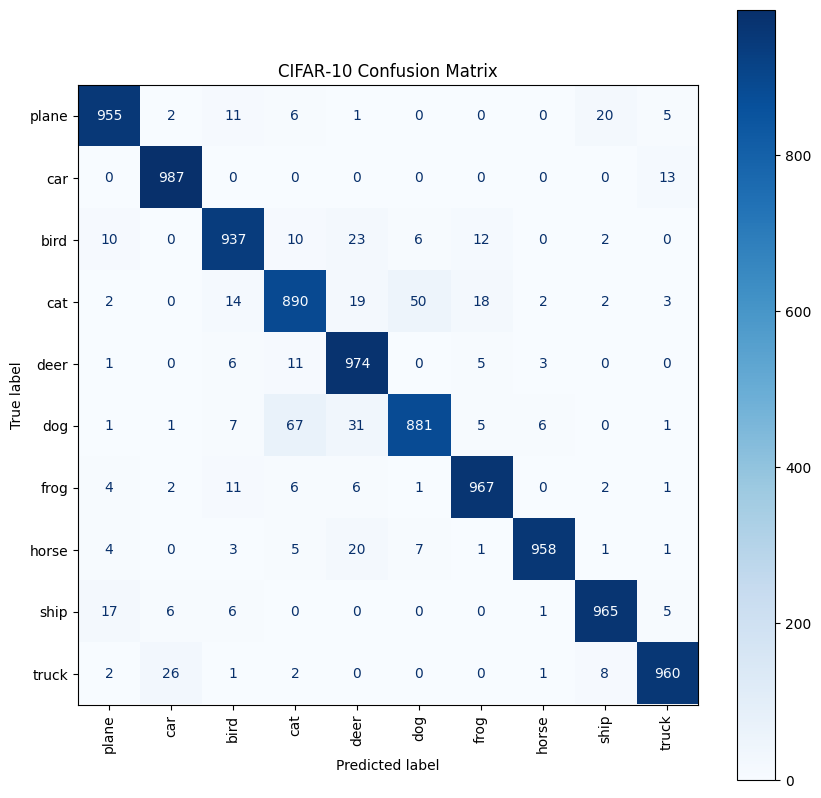

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# Classification report (Precision／Recall／F1)
print("\nClassification Report:\n",
      classification_report(y_true, y_pred, target_names=names, digits=4))

# 混同行列の計算と可視化
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title("CIFAR‑10 Confusion Matrix")
plt.grid(False)
plt.show()


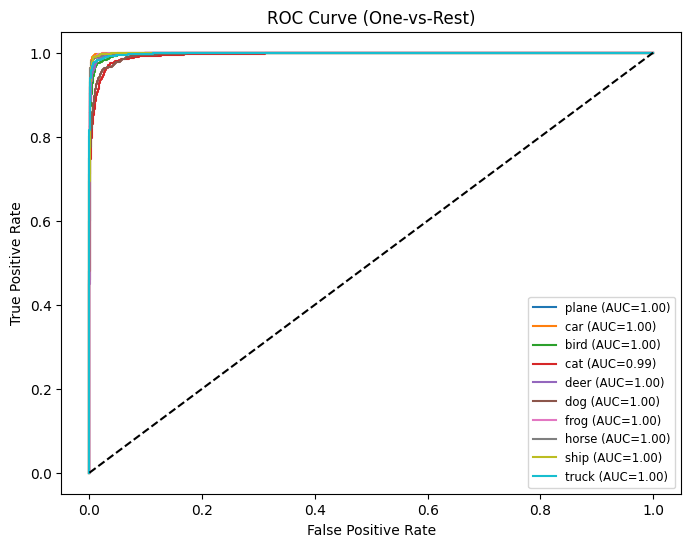

In [ ]:
# y_true を one-hot 表現に変換
y_true_bin = label_binarize(y_true, classes=list(range(10)))

# ROC 曲線・AUC
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_score[:, i])

# プロット
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{names[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right', fontsize='small')
plt.show()

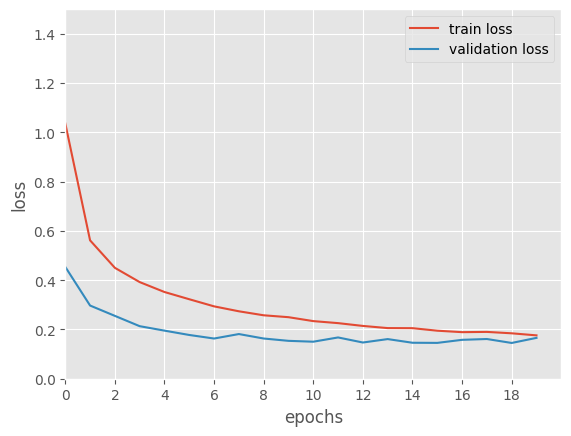

In [ ]:
plt.style.use("ggplot")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim(0,20)
plt.ylim(0,1.5)
plt.xticks(range(0, 19, 2))
plt.legend()

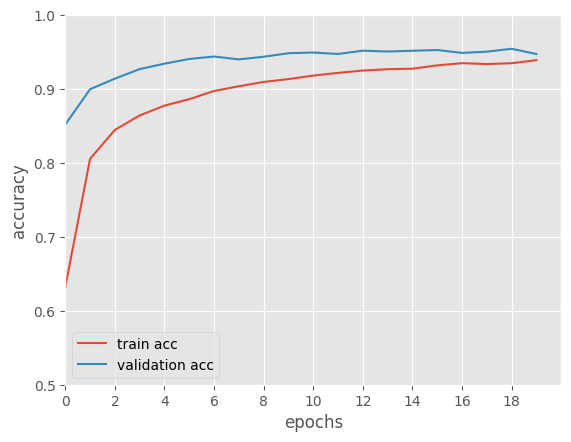

In [ ]:
plt.plot(accs, label="train acc")
plt.plot(val_accs, label="validation acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xlim(0,20)
plt.ylim(0.5,1)
plt.xticks(range(0, 19, 2))
plt.legend()

##Mixup 0.5

In [ ]:
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  # CIFAR-10の平均
                         std=[0.2023, 0.1994, 0.2010])   # CIFAR-10の標準偏差
])


val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  # CIFAR-10の平均
                         std=[0.2023, 0.1994, 0.2010])   # CIFAR-10の標準偏差
])

raw_dataset =datasets.CIFAR10(root="./data", train=False, download=True, transform=None)
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
validation_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

100%|██████████| 170M/170M [00:04<00:00, 42.3MB/s]


In [ ]:
names = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
data_iter = iter(train_dataloader)
imgs, labels = next(data_iter)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

In [ ]:
# def mixup_data(x, y, alpha=1.0):
#     if alpha > 0:
#         lam = np.random.beta(alpha, alpha)
#     else:
#         lam = 1

#     batch_size = x.size()[0]
#     index = torch.randperm(batch_size).cuda()

#     mixed_x = lam * x + (1 - lam) * x[index, :]
#     y_a, y_b = y, y[index]
#     return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

In [ ]:
from torch.autograd import Variable
from tqdm import tqdm

num_epochs=20
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_acc = 0.0

    for imgs, labels in tqdm(train_dataloader):
        imgs = imgs.to(device)
        labels = labels.to(device)

        lam = np.random.beta(0.5, 0.5)
        perm = torch.randperm(imgs.size(0)).to(device)

        mixed_imgs = lam * imgs + (1 - lam) * imgs[perm]
        targets_a = labels
        targets_b = labels[perm]

        # img, targets_a, targets_b, lam = mixup_data(imgs, labels,
        #                                                args.alpha)
        # imgs, targets_a, targets_b = map(Variable, (imgs,
        #                                               targets_a, targets_b))
        optimizer.zero_grad()
        output = model(mixed_imgs)
        loss = mixup_criterion(criterion, output, targets_a, targets_b, lam)
        loss.backward()
        optimizer.step()
        scheduler.step()

        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        correct = lam * pred.eq(targets_a).float().mean() + (1 - lam) * pred.eq(targets_b).float().mean()
        running_acc += correct

    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)

#validation
    model.eval()
    y_true, y_pred, y_score = [], [], []
    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = model(val_imgs)
        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc += torch.mean(val_pred.eq(val_labels).float()).item()

        probs = F.softmax(val_output, dim=1).cpu().detach().numpy()
        preds = np.argmax(probs, axis=1)

        y_true.extend(val_labels.cpu().numpy())
        y_pred.extend(preds)
        y_score.extend(probs)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_score = np.array(y_score)

    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)

    print("epoch: {}, loss: {}, acc: {}, val loss: {}, val acc: {}".format(epoch, running_loss, running_acc, val_running_loss, val_running_acc))

acc = accuracy_score(y_true, y_pred)
recall_macro = recall_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy       : {acc:.4f}')
print(f'Precision (macro): {precision_macro:.4f}')
print(f'Recall (macro)   : {recall_macro:.4f}')
print(f'F1 Score (macro): {f1_macro:.4f}')

100%|██████████| 1563/1563 [01:18<00:00, 20.03it/s]


epoch: 0, loss: 1.1939396964706677, acc: 0.6357161402702332, val loss: 0.3733511167688492, val acc: 0.90625


100%|██████████| 1563/1563 [01:16<00:00, 20.52it/s]


epoch: 1, loss: 0.8935166590168395, acc: 0.7568721771240234, val loss: 0.415979519200782, val acc: 0.9107428115015974


100%|██████████| 1563/1563 [01:16<00:00, 20.43it/s]


epoch: 2, loss: 0.8187479912300409, acc: 0.7796316742897034, val loss: 0.3170003761498692, val acc: 0.9367012779552716


100%|██████████| 1563/1563 [01:18<00:00, 19.98it/s]


epoch: 3, loss: 0.7665460059682643, acc: 0.7948411107063293, val loss: 0.20611898620098162, val acc: 0.9510782747603834


100%|██████████| 1563/1563 [01:16<00:00, 20.45it/s]


epoch: 4, loss: 0.7468299843223142, acc: 0.7988137602806091, val loss: 0.34591629372808497, val acc: 0.9375998402555911


100%|██████████| 1563/1563 [01:17<00:00, 20.14it/s]


epoch: 5, loss: 0.7032724943188372, acc: 0.8160812258720398, val loss: 0.2807104601837195, val acc: 0.9440894568690096


100%|██████████| 1563/1563 [01:16<00:00, 20.48it/s]


epoch: 6, loss: 0.7428077181892961, acc: 0.7967908978462219, val loss: 0.32852680019486824, val acc: 0.9459864217252396


100%|██████████| 1563/1563 [01:16<00:00, 20.52it/s]


epoch: 7, loss: 0.7057089046196761, acc: 0.8097994327545166, val loss: 0.22005273346988538, val acc: 0.9509784345047924


100%|██████████| 1563/1563 [01:16<00:00, 20.44it/s]


epoch: 8, loss: 0.6924263797998333, acc: 0.811192512512207, val loss: 0.27504040153262715, val acc: 0.9493809904153354


100%|██████████| 1563/1563 [01:16<00:00, 20.47it/s]


epoch: 9, loss: 0.6977876163539444, acc: 0.8103951215744019, val loss: 0.20827529208062176, val acc: 0.952176517571885


100%|██████████| 1563/1563 [01:16<00:00, 20.44it/s]


epoch: 10, loss: 0.6777459205279004, acc: 0.8157316446304321, val loss: 0.28634697686845123, val acc: 0.9480830670926518


100%|██████████| 1563/1563 [01:16<00:00, 20.41it/s]


epoch: 11, loss: 0.6809634678596088, acc: 0.8134974241256714, val loss: 0.2852239919641909, val acc: 0.9490814696485623


100%|██████████| 1563/1563 [01:16<00:00, 20.42it/s]


epoch: 12, loss: 0.6691001818044039, acc: 0.8177608847618103, val loss: 0.20863907910383547, val acc: 0.9605630990415336


100%|██████████| 1563/1563 [01:16<00:00, 20.36it/s]


epoch: 13, loss: 0.6733819120352038, acc: 0.8131667971611023, val loss: 0.24664587815539143, val acc: 0.953973642172524


100%|██████████| 1563/1563 [01:16<00:00, 20.36it/s]


epoch: 14, loss: 0.6454785101595963, acc: 0.8220322728157043, val loss: 0.19954372611575233, val acc: 0.9554712460063898


100%|██████████| 1563/1563 [01:16<00:00, 20.45it/s]


epoch: 15, loss: 0.670688694272064, acc: 0.8151405453681946, val loss: 0.28372786691584906, val acc: 0.9498801916932907


100%|██████████| 1563/1563 [01:16<00:00, 20.51it/s]


epoch: 16, loss: 0.663081865608144, acc: 0.815794050693512, val loss: 0.26612251068646914, val acc: 0.9527755591054313


100%|██████████| 1563/1563 [01:16<00:00, 20.48it/s]


epoch: 17, loss: 0.6470280100942439, acc: 0.8200749158859253, val loss: 0.18370798465828544, val acc: 0.9605630990415336


100%|██████████| 1563/1563 [01:16<00:00, 20.45it/s]


epoch: 18, loss: 0.6417404010704816, acc: 0.8219480514526367, val loss: 0.19778703207882067, val acc: 0.9566693290734825


100%|██████████| 1563/1563 [01:16<00:00, 20.46it/s]


epoch: 19, loss: 0.6570516110541477, acc: 0.8147038221359253, val loss: 0.2930042703216449, val acc: 0.9464856230031949
Accuracy       : 0.9468
Precision (macro): 0.9485
Recall (macro)   : 0.9468
F1 Score (macro): 0.9469


Accuracy: 0.9468

Classification Report:
               precision    recall  f1-score   support

       plane     0.9719    0.8990    0.9340      1000
         car     0.9644    0.9750    0.9697      1000
        bird     0.9530    0.9330    0.9429      1000
         cat     0.8777    0.9330    0.9045      1000
        deer     0.9663    0.9450    0.9555      1000
         dog     0.9639    0.8800    0.9200      1000
        frog     0.9790    0.9790    0.9790      1000
       horse     0.9760    0.9740    0.9750      1000
        ship     0.8741    0.9790    0.9236      1000
       truck     0.9585    0.9710    0.9647      1000

    accuracy                         0.9468     10000
   macro avg     0.9485    0.9468    0.9469     10000
weighted avg     0.9485    0.9468    0.9469     10000



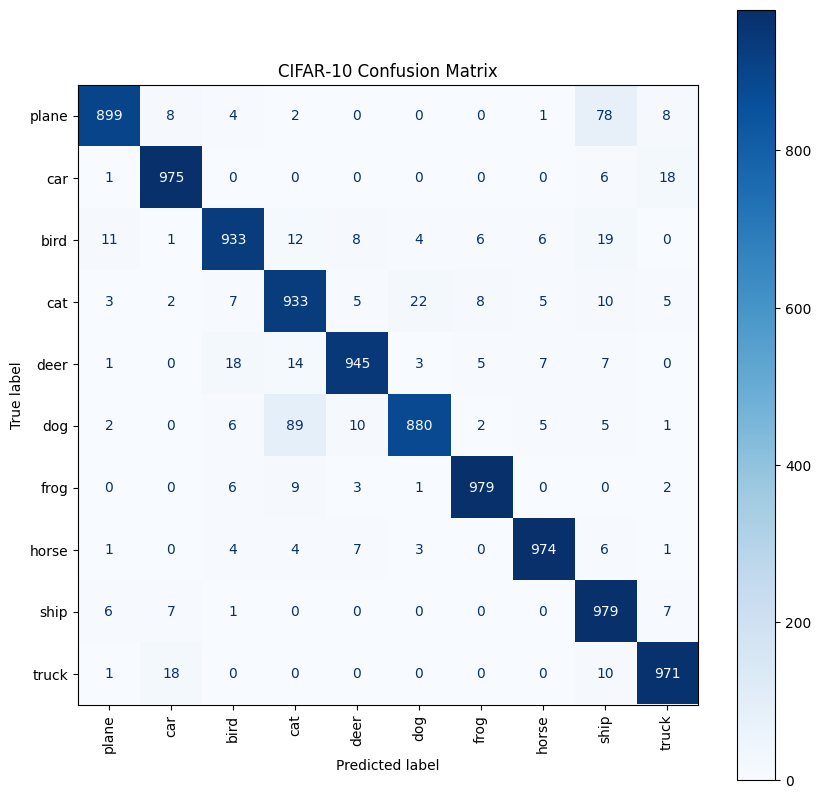

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# Classification report (Precision／Recall／F1)
print("\nClassification Report:\n",
      classification_report(y_true, y_pred, target_names=names, digits=4))

# 混同行列の計算と可視化
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title("CIFAR‑10 Confusion Matrix")
plt.show()


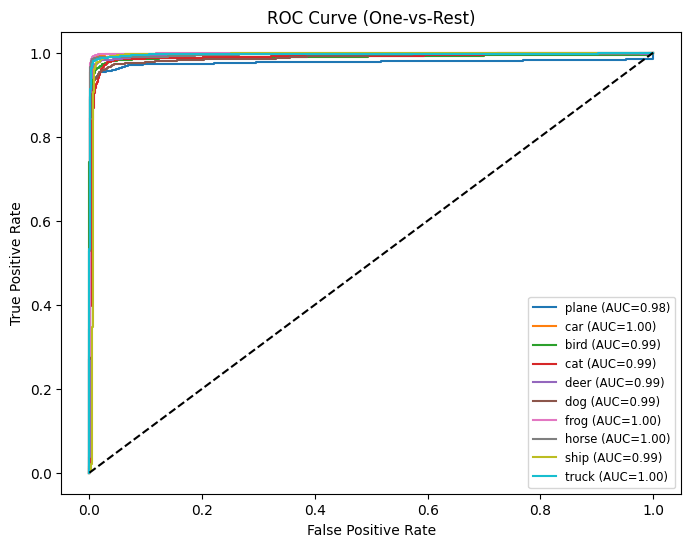

In [ ]:
# y_true を one-hot 表現に変換
y_true_bin = label_binarize(y_true, classes=list(range(10)))

# ROC 曲線・AUC
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_score[:, i])

# プロット
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{names[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right', fontsize='small')
plt.show()

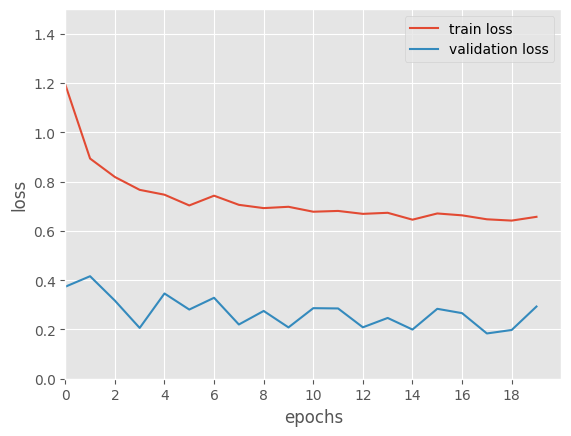

In [ ]:
plt.style.use("ggplot")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim(0,20)
plt.ylim(0,1.5)
plt.xticks(range(0, 19, 2))
plt.legend()

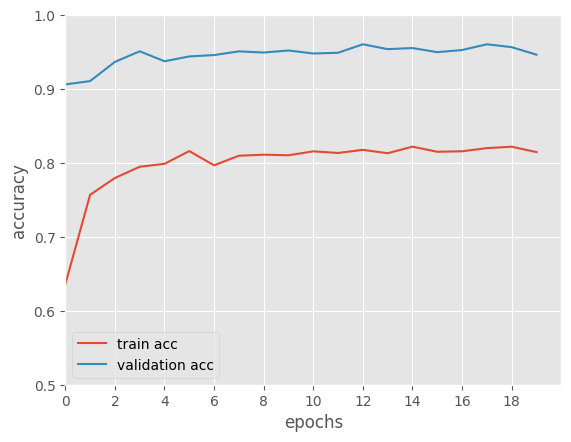

In [ ]:
plt.plot([accs_.cpu() for accs_ in accs], label="train acc")
plt.plot(val_accs, label="validation acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xlim(0,20)
plt.ylim(0.5,1)
plt.xticks(range(0, 19, 2))
plt.legend()

##Mixup (10epochまで)

In [ ]:
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  # CIFAR-10の平均
                         std=[0.2023, 0.1994, 0.2010])   # CIFAR-10の標準偏差
])


val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  # CIFAR-10の平均
                         std=[0.2023, 0.1994, 0.2010])   # CIFAR-10の標準偏差
])

raw_dataset =datasets.CIFAR10(root="./data", train=False, download=True, transform=None)
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
validation_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

In [ ]:
names = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
data_iter = iter(train_dataloader)
imgs, labels = next(data_iter)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

In [ ]:
def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

In [ ]:
from torch.autograd import Variable
from tqdm import tqdm

num_epochs=20
mixup_stop_epoch = 10
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_acc = 0.0

    for imgs, labels in tqdm(train_dataloader):
        imgs = imgs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        if epoch < mixup_stop_epoch:

            lam = np.random.beta(0.2, 0.2)
            perm = torch.randperm(imgs.size(0)).to(device)

            mixed_imgs = lam * imgs + (1 - lam) * imgs[perm]
            targets_a = labels
            targets_b = labels[perm]

            output = model(mixed_imgs)
            loss = mixup_criterion(criterion, output, targets_a, targets_b, lam)

            pred = torch.argmax(output, dim=1)
            correct = lam * pred.eq(targets_a).float().mean() + (1 - lam) * pred.eq(targets_b).float().mean()

        else:
            output = model(imgs)
            loss = criterion(output, labels)

            pred = torch.argmax(output, dim=1)
            correct = pred.eq(labels).float().mean()

        loss.backward()
        optimizer.step()
        scheduler.step()

        running_loss += loss.item()
        running_acc += correct

    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)

#validation
    model.eval()
    y_true, y_pred, y_score = [], [], []
    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = model(val_imgs)
        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc += torch.mean(val_pred.eq(val_labels).float()).item()

        probs = F.softmax(val_output, dim=1).cpu().detach().numpy()
        preds = np.argmax(probs, axis=1)

        y_true.extend(val_labels.cpu().numpy())
        y_pred.extend(preds)
        y_score.extend(probs)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_score = np.array(y_score)

    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)

    print("epoch: {}, loss: {}, acc: {}, val loss: {}, val acc: {}".format(epoch, running_loss, running_acc, val_running_loss, val_running_acc))

acc = accuracy_score(y_true, y_pred)
recall_macro = recall_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy       : {acc:.4f}')
print(f'Precision (macro): {precision_macro:.4f}')
print(f'Recall (macro)   : {recall_macro:.4f}')
print(f'F1 Score (macro): {f1_macro:.4f}')

100%|██████████| 1563/1563 [01:16<00:00, 20.35it/s]


epoch: 0, loss: 0.9921561181592926, acc: 0.6967458128929138, val loss: 0.35754418801575805, val acc: 0.9073482428115016


100%|██████████| 1563/1563 [01:15<00:00, 20.61it/s]


epoch: 1, loss: 0.6188405446412658, acc: 0.8327466249465942, val loss: 0.26600644416131153, val acc: 0.9271166134185304


100%|██████████| 1563/1563 [01:15<00:00, 20.62it/s]


epoch: 2, loss: 0.5456397126947773, acc: 0.8578992486000061, val loss: 0.24909550829912527, val acc: 0.9385982428115016


100%|██████████| 1563/1563 [01:15<00:00, 20.63it/s]


epoch: 3, loss: 0.4895918891918312, acc: 0.8769664764404297, val loss: 0.22140563725711057, val acc: 0.9350039936102237


100%|██████████| 1563/1563 [01:15<00:00, 20.67it/s]


epoch: 4, loss: 0.472599960728331, acc: 0.8814837336540222, val loss: 0.2679924667119599, val acc: 0.9389976038338658


100%|██████████| 1563/1563 [01:15<00:00, 20.57it/s]


epoch: 5, loss: 0.44728944127141634, acc: 0.8890179991722107, val loss: 0.21758766453296613, val acc: 0.9464856230031949


100%|██████████| 1563/1563 [01:16<00:00, 20.54it/s]


epoch: 6, loss: 0.4444200867880553, acc: 0.8885433077812195, val loss: 0.19858461707687605, val acc: 0.9476837060702875


100%|██████████| 1563/1563 [01:16<00:00, 20.55it/s]


epoch: 7, loss: 0.463239530690124, acc: 0.8811468482017517, val loss: 0.19009282070988665, val acc: 0.9513777955271565


100%|██████████| 1563/1563 [01:15<00:00, 20.65it/s]


epoch: 8, loss: 0.4217350957510005, acc: 0.8946524858474731, val loss: 0.16922297377508289, val acc: 0.9548722044728435


100%|██████████| 1563/1563 [01:16<00:00, 20.56it/s]


epoch: 9, loss: 0.42278994048465346, acc: 0.8932191133499146, val loss: 0.16804399421682564, val acc: 0.9514776357827476


100%|██████████| 1563/1563 [01:14<00:00, 20.89it/s]


epoch: 10, loss: 0.02869009193481287, acc: 0.9908029437065125, val loss: 0.18224783416818113, val acc: 0.9462859424920128


100%|██████████| 1563/1563 [01:15<00:00, 20.83it/s]


epoch: 11, loss: 0.02313493927500538, acc: 0.9923624396324158, val loss: 0.18008743041491035, val acc: 0.9488817891373802


100%|██████████| 1563/1563 [01:14<00:00, 20.85it/s]


epoch: 12, loss: 0.01566408770053495, acc: 0.9951015710830688, val loss: 0.1912646035514266, val acc: 0.950279552715655


100%|██████████| 1563/1563 [01:15<00:00, 20.81it/s]


epoch: 13, loss: 0.014186011888440958, acc: 0.995621383190155, val loss: 0.2267886748966633, val acc: 0.9415934504792333


100%|██████████| 1563/1563 [01:15<00:00, 20.78it/s]


epoch: 14, loss: 0.014845461159973322, acc: 0.9953814744949341, val loss: 0.19503353913270008, val acc: 0.944888178913738


100%|██████████| 1563/1563 [01:15<00:00, 20.81it/s]


epoch: 15, loss: 0.01153762723435266, acc: 0.9961212277412415, val loss: 0.28605004100180337, val acc: 0.9318091054313099


100%|██████████| 1563/1563 [01:15<00:00, 20.75it/s]


epoch: 16, loss: 0.008803989455268927, acc: 0.9974608421325684, val loss: 0.19742220167603236, val acc: 0.9493809904153354


100%|██████████| 1563/1563 [01:14<00:00, 20.92it/s]


epoch: 17, loss: 0.009176655914347524, acc: 0.9971009492874146, val loss: 0.2518189861027252, val acc: 0.9412939297124601


100%|██████████| 1563/1563 [01:14<00:00, 20.90it/s]


epoch: 18, loss: 0.010704381309731921, acc: 0.9968609809875488, val loss: 0.2127308335704595, val acc: 0.9476837060702875


100%|██████████| 1563/1563 [01:15<00:00, 20.82it/s]


epoch: 19, loss: 0.006769272768173776, acc: 0.9978407025337219, val loss: 0.20876467836010582, val acc: 0.9443889776357828
Accuracy       : 0.9444
Precision (macro): 0.9458
Recall (macro)   : 0.9444
F1 Score (macro): 0.9446


Accuracy: 0.9444

Classification Report:
               precision    recall  f1-score   support

       plane     0.9780    0.9350    0.9560      1000
         car     0.9544    0.9830    0.9685      1000
        bird     0.9626    0.9270    0.9445      1000
         cat     0.8323    0.9130    0.8708      1000
        deer     0.9405    0.9640    0.9521      1000
         dog     0.9323    0.8670    0.8984      1000
        frog     0.9735    0.9560    0.9647      1000
       horse     0.9698    0.9630    0.9664      1000
        ship     0.9409    0.9870    0.9634      1000
       truck     0.9733    0.9490    0.9610      1000

    accuracy                         0.9444     10000
   macro avg     0.9458    0.9444    0.9446     10000
weighted avg     0.9458    0.9444    0.9446     10000



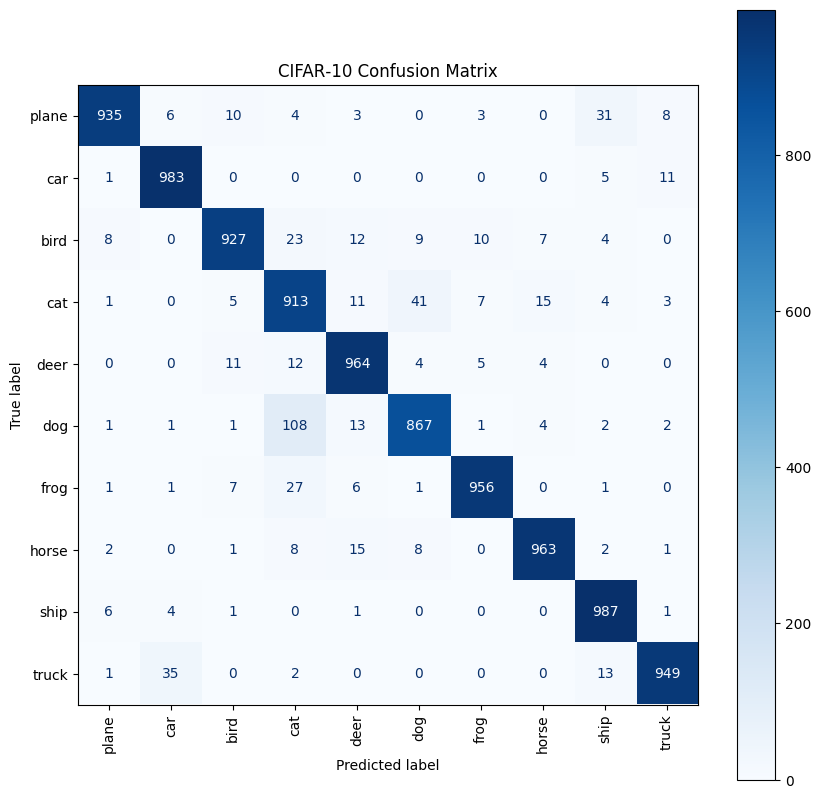

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# Classification report (Precision／Recall／F1)
print("\nClassification Report:\n",
      classification_report(y_true, y_pred, target_names=names, digits=4))

# 混同行列の計算と可視化
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title("CIFAR‑10 Confusion Matrix")
plt.show()


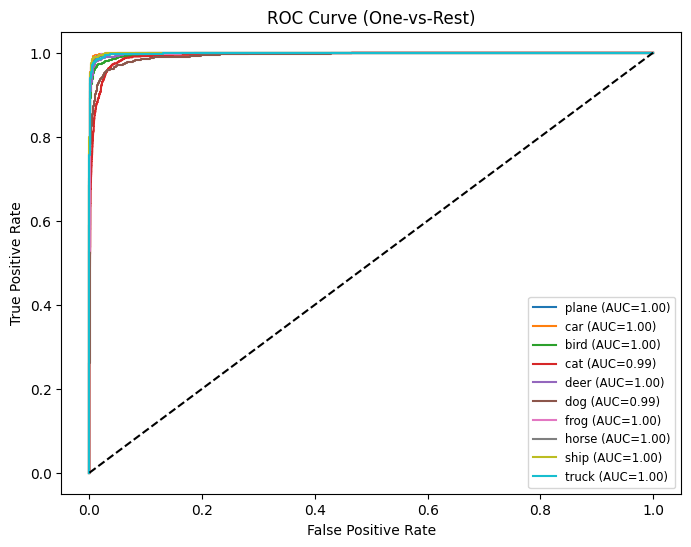

In [ ]:
# y_true を one-hot 表現に変換
y_true_bin = label_binarize(y_true, classes=list(range(10)))

# ROC 曲線・AUC
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_score[:, i])

# プロット
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{names[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right', fontsize='small')
plt.show()

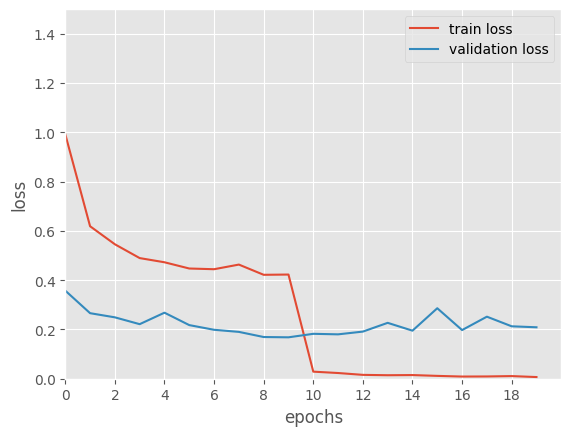

In [ ]:
plt.style.use("ggplot")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim(0,20)
plt.ylim(0,1.5)
plt.xticks(range(0, 19, 2))
plt.legend()

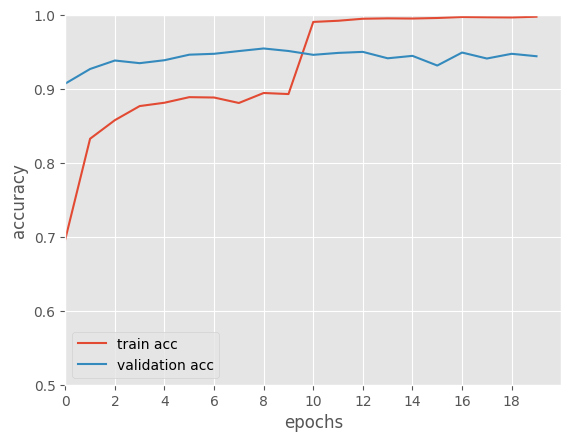

In [ ]:
plt.plot([accs_.cpu() for accs_ in accs], label="train acc")
plt.plot(val_accs, label="validation acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xlim(0,20)
plt.ylim(0.5,1)
plt.xticks(range(0, 19, 2))
plt.legend()

## ZCA + Flip+ Crop + Rotation 10 + Mixup 0.2 + Randomsharpness (epoch 30)


In [ ]:
class ZCAWhitening():
    def __init__(self, epsilon=1e-4, device="cuda"):
        self.epsilon = epsilon
        self.device = device

    def fit(self, images):  # 変換行列と平均をデータから計算
        x = images[0][0].reshape(1, -1)  # 画像（1枚）を1次元化
        self.mean = torch.zeros([1, x.size()[1]]).to(self.device)  # 平均値を格納するテンソル．xと同じ形状
        con_matrix = torch.zeros([x.size()[1], x.size()[1]]).to(self.device)
        for i in range(len(images)):  # 各データについての平均を取る
            x = images[i][0].reshape(1, -1).to(self.device)
            self.mean += x / len(images)
            con_matrix += torch.mm(x.t(), x) / len(images)
            if i % 10000 == 0:
                print("{0}/{1}".format(i, len(images)))
        con_matrix -= torch.mm(self.mean.t(), self.mean)
        # E: 固有値 V: 固有ベクトルを並べたもの
        E, V = torch.linalg.eigh(con_matrix)  # 固有値分解
        self.ZCA_matrix = torch.mm(torch.mm(V, torch.diag((E.squeeze()+self.epsilon)**(-0.5))), V.t())  # A(\Lambda + \epsilon I)^{1/2}A^T
        print("completed!")

    def __call__(self, x):
        size = x.size()
        x = x.reshape(1, -1).to(self.device)
        x -= self.mean  # x - \bar{x}
        x = torch.mm(x, self.ZCA_matrix.t())
        x = x.reshape(tuple(size))
        x = x.to("cpu")
        return x

zca = ZCAWhitening()
raw_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
zca.fit(raw_dataset)

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.2),
    transforms.ToTensor(),
    zca
])


val_transform = transforms.Compose([
    transforms.ToTensor(),
    zca
])

raw_dataset =datasets.CIFAR10(root="./data", train=False, download=True, transform=None)
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
validation_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

100%|██████████| 170M/170M [00:13<00:00, 12.9MB/s]


0/50000
10000/50000
20000/50000
30000/50000
40000/50000
completed!


In [ ]:
names = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
data_iter = iter(train_dataloader)
imgs, labels = next(data_iter)

In [ ]:
def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

In [ ]:
from torch.autograd import Variable
from tqdm import tqdm
num_epochs=30
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_acc = 0.0

    for imgs, labels in tqdm(train_dataloader):
        imgs = imgs.to(device)
        labels = labels.to(device)

        lam = np.random.beta(0.2, 0.2)
        perm = torch.randperm(imgs.size(0)).to(device)

        mixed_imgs = lam * imgs + (1 - lam) * imgs[perm]
        targets_a = labels
        targets_b = labels[perm]

        optimizer.zero_grad()
        output = model(mixed_imgs)
        loss = mixup_criterion(criterion, output, targets_a, targets_b, lam)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        correct = lam * pred.eq(targets_a).float().mean() + (1 - lam) * pred.eq(targets_b).float().mean()
        running_acc += correct

    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)

#validation
    model.eval()
    y_true, y_pred, y_score = [], [], []
    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = model(val_imgs)
        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc += torch.mean(val_pred.eq(val_labels).float()).item()

        probs = F.softmax(val_output, dim=1).cpu().detach().numpy()
        preds = np.argmax(probs, axis=1)

        y_true.extend(val_labels.cpu().numpy())
        y_pred.extend(preds)
        y_score.extend(probs)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_score = np.array(y_score)


    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)

    print("epoch: {}, loss: {}, acc: {}, val loss: {}, val acc: {}".format(epoch, running_loss, running_acc, val_running_loss, val_running_acc))
    scheduler.step()

acc = accuracy_score(y_true, y_pred)
recall_macro = recall_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy       : {acc:.4f}')
print(f'Precision (macro): {precision_macro:.4f}')
print(f'Recall (macro)   : {recall_macro:.4f}')
print(f'F1 Score (macro): {f1_macro:.4f}')

100%|██████████| 1563/1563 [01:42<00:00, 15.23it/s]


epoch: 0, loss: 1.1401641394892947, acc: 0.6362200379371643, val loss: 0.441721997845668, val acc: 0.8703075079872205


100%|██████████| 1563/1563 [01:41<00:00, 15.36it/s]


epoch: 1, loss: 0.7840642243461661, acc: 0.7735291719436646, val loss: 0.29843935470421096, val acc: 0.9165335463258786


100%|██████████| 1563/1563 [01:41<00:00, 15.36it/s]


epoch: 2, loss: 0.6871971783877105, acc: 0.8036086559295654, val loss: 0.25444777553883224, val acc: 0.9249201277955271


100%|██████████| 1563/1563 [01:41<00:00, 15.36it/s]


epoch: 3, loss: 0.6438408468707547, acc: 0.8196492791175842, val loss: 0.21215649598989242, val acc: 0.9361022364217252


100%|██████████| 1563/1563 [01:42<00:00, 15.31it/s]


epoch: 4, loss: 0.5965991157261382, acc: 0.8336809873580933, val loss: 0.24442466565023976, val acc: 0.9375


100%|██████████| 1563/1563 [01:41<00:00, 15.41it/s]


epoch: 5, loss: 0.5800291747665146, acc: 0.8405405879020691, val loss: 0.22698164395630932, val acc: 0.9371006389776357


100%|██████████| 1563/1563 [01:42<00:00, 15.32it/s]


epoch: 6, loss: 0.5681366763796875, acc: 0.8463456034660339, val loss: 0.18149806805454885, val acc: 0.9440894568690096


100%|██████████| 1563/1563 [01:41<00:00, 15.35it/s]


epoch: 7, loss: 0.524439927410413, acc: 0.8606142401695251, val loss: 0.17616787358832817, val acc: 0.9501797124600639


100%|██████████| 1563/1563 [01:41<00:00, 15.43it/s]


epoch: 8, loss: 0.5128448908649247, acc: 0.8619627952575684, val loss: 0.17238243266987724, val acc: 0.9515774760383386


100%|██████████| 1563/1563 [01:41<00:00, 15.39it/s]


epoch: 9, loss: 0.5120946170970135, acc: 0.8646297454833984, val loss: 0.1534776092051698, val acc: 0.9561701277955271


100%|██████████| 1563/1563 [01:41<00:00, 15.38it/s]


epoch: 10, loss: 0.49093528004912557, acc: 0.8721734881401062, val loss: 0.14414117616205552, val acc: 0.9562699680511182


100%|██████████| 1563/1563 [01:42<00:00, 15.26it/s]


epoch: 11, loss: 0.4811442610584271, acc: 0.8754300475120544, val loss: 0.18988653274770742, val acc: 0.9562699680511182


100%|██████████| 1563/1563 [01:41<00:00, 15.33it/s]


epoch: 12, loss: 0.46554747931030593, acc: 0.8818347454071045, val loss: 0.135841973709127, val acc: 0.959564696485623


100%|██████████| 1563/1563 [01:41<00:00, 15.34it/s]


epoch: 13, loss: 0.4643365019231961, acc: 0.88118577003479, val loss: 0.15128389322838653, val acc: 0.9593650159744409


100%|██████████| 1563/1563 [01:42<00:00, 15.24it/s]


epoch: 14, loss: 0.4598161381364264, acc: 0.8823302984237671, val loss: 0.1449663388355376, val acc: 0.9607627795527156


100%|██████████| 1563/1563 [01:41<00:00, 15.34it/s]


epoch: 15, loss: 0.4605891310679294, acc: 0.8814968466758728, val loss: 0.14415303658777343, val acc: 0.9609624600638977


100%|██████████| 1563/1563 [01:41<00:00, 15.41it/s]


epoch: 16, loss: 0.4504985004694452, acc: 0.8858554363250732, val loss: 0.161153463283762, val acc: 0.9615615015974441


100%|██████████| 1563/1563 [01:41<00:00, 15.33it/s]


epoch: 17, loss: 0.44303758193334175, acc: 0.8878740668296814, val loss: 0.12943610618004023, val acc: 0.9626597444089456


100%|██████████| 1563/1563 [01:42<00:00, 15.32it/s]


epoch: 18, loss: 0.4311789367924446, acc: 0.892528235912323, val loss: 0.1261109740208513, val acc: 0.963258785942492


100%|██████████| 1563/1563 [01:41<00:00, 15.39it/s]


epoch: 19, loss: 0.443973231601415, acc: 0.8874300718307495, val loss: 0.1307567415384058, val acc: 0.963258785942492


100%|██████████| 1563/1563 [01:41<00:00, 15.37it/s]


epoch: 20, loss: 0.4497846203745341, acc: 0.8863927721977234, val loss: 0.12830351468639822, val acc: 0.9636581469648562


100%|██████████| 1563/1563 [01:41<00:00, 15.44it/s]


epoch: 21, loss: 0.44080623914532346, acc: 0.8886314034461975, val loss: 0.15488949608498107, val acc: 0.9628594249201278


100%|██████████| 1563/1563 [01:41<00:00, 15.42it/s]


epoch: 22, loss: 0.43445092060523355, acc: 0.8929778933525085, val loss: 0.14368396332136357, val acc: 0.9623602236421726


100%|██████████| 1563/1563 [01:42<00:00, 15.29it/s]


epoch: 23, loss: 0.4250802276036342, acc: 0.8915753960609436, val loss: 0.13457895924869817, val acc: 0.9628594249201278


100%|██████████| 1563/1563 [01:42<00:00, 15.32it/s]


epoch: 24, loss: 0.41540404585677526, acc: 0.8963977694511414, val loss: 0.1279129483424627, val acc: 0.9652555910543131


100%|██████████| 1563/1563 [01:41<00:00, 15.44it/s]


epoch: 25, loss: 0.4532683938439287, acc: 0.8843648433685303, val loss: 0.1259961494426139, val acc: 0.9640575079872205


100%|██████████| 1563/1563 [01:41<00:00, 15.36it/s]


epoch: 26, loss: 0.4486011627545224, acc: 0.88526850938797, val loss: 0.16301122644600777, val acc: 0.9618610223642172


100%|██████████| 1563/1563 [01:41<00:00, 15.35it/s]


epoch: 27, loss: 0.4340728645493596, acc: 0.8906919956207275, val loss: 0.13859021853500852, val acc: 0.9608626198083067


100%|██████████| 1563/1563 [01:41<00:00, 15.36it/s]


epoch: 28, loss: 0.4469389289409585, acc: 0.8876723647117615, val loss: 0.15399001210261457, val acc: 0.9592651757188498


100%|██████████| 1563/1563 [01:41<00:00, 15.35it/s]


epoch: 29, loss: 0.45770372234056067, acc: 0.8823704719543457, val loss: 0.15574340997174524, val acc: 0.959564696485623
Accuracy       : 0.9596
Precision (macro): 0.9596
Recall (macro)   : 0.9596
F1 Score (macro): 0.9596


Accuracy: 0.9596

Classification Report:
               precision    recall  f1-score   support

       plane     0.9623    0.9690    0.9656      1000
         car     0.9677    0.9890    0.9782      1000
        bird     0.9513    0.9570    0.9541      1000
         cat     0.9147    0.9120    0.9134      1000
        deer     0.9529    0.9720    0.9624      1000
         dog     0.9329    0.9180    0.9254      1000
        frog     0.9760    0.9740    0.9750      1000
       horse     0.9739    0.9710    0.9725      1000
        ship     0.9798    0.9710    0.9754      1000
       truck     0.9847    0.9630    0.9737      1000

    accuracy                         0.9596     10000
   macro avg     0.9596    0.9596    0.9596     10000
weighted avg     0.9596    0.9596    0.9596     10000



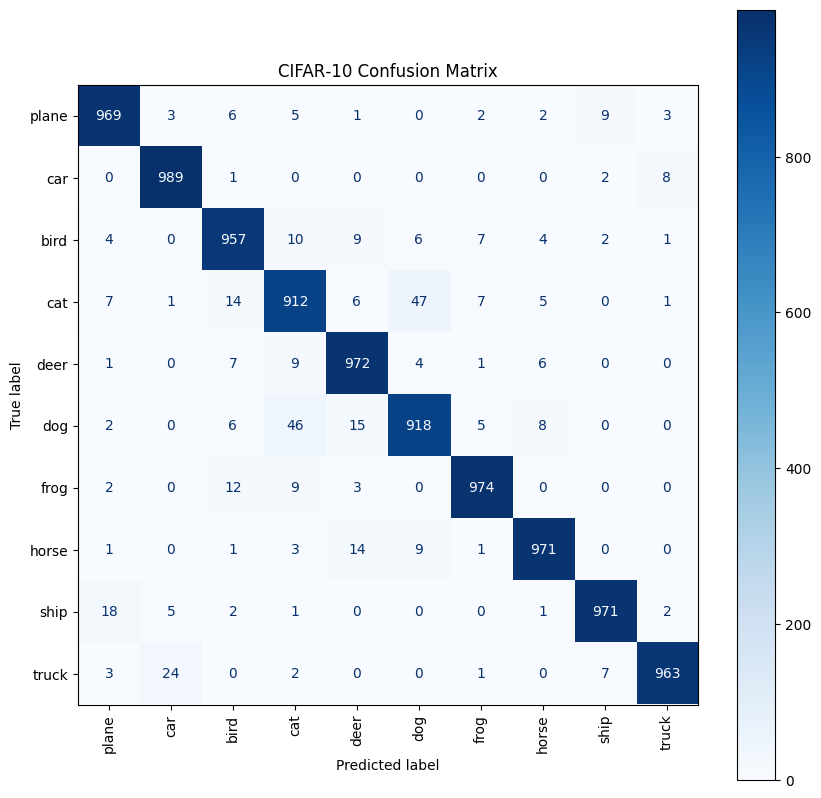

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# Classification report (Precision／Recall／F1)
print("\nClassification Report:\n",
      classification_report(y_true, y_pred, target_names=names, digits=4))

# 混同行列の計算と可視化
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title("CIFAR‑10 Confusion Matrix")
plt.show()

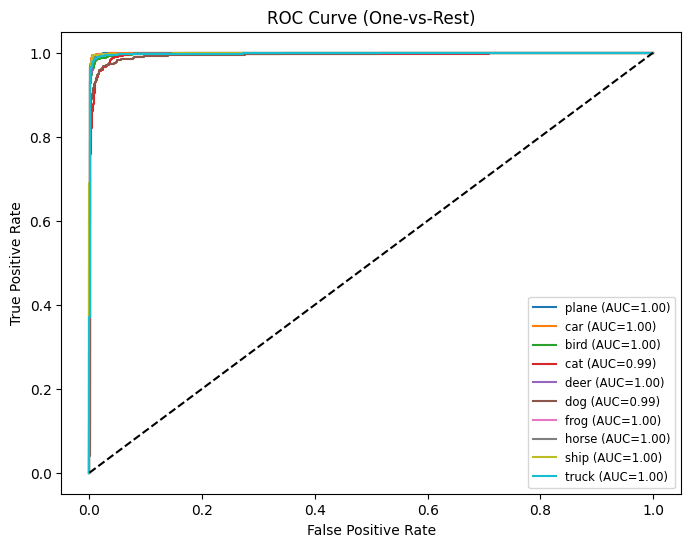

In [ ]:
# y_true を one-hot 表現に変換
y_true_bin = label_binarize(y_true, classes=list(range(10)))

# ROC 曲線・AUC
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_score[:, i])

# プロット
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{names[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right', fontsize='small')
plt.show()

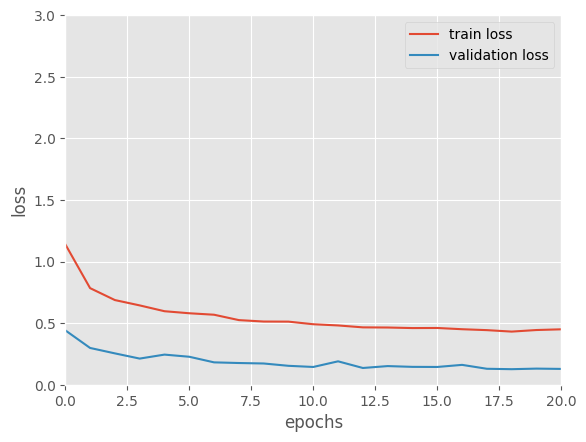

In [ ]:
plt.style.use("ggplot")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim(0,20)
plt.ylim(0,3)
plt.legend()

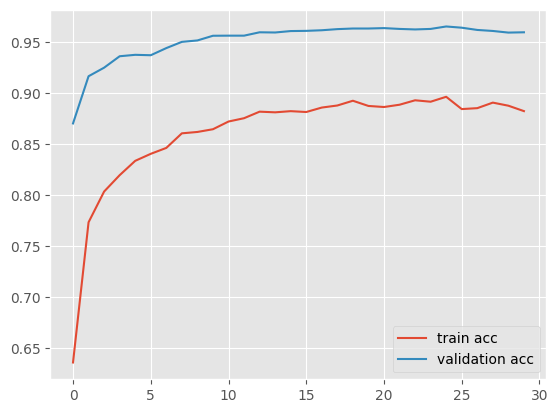

In [ ]:
plt.plot([accs_.cpu() for accs_ in accs], label="train acc")
plt.plot(val_accs, label="validation acc")
plt.legend()

## ZCA + Flip+ Crop + Rotation 10 + Mixup 0.2 Dropout


In [ ]:
#conv1をcifar10のサイズに合わせて変更
def get_cifar10_resnet50():
    model = resnet50(weights=ResNet50_Weights.DEFAULT) #pretrained=Trueと同じ
    model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
    model.maxpool = nn.Identity()
    model.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(model.fc.in_features, 10)
)

    return model

model = get_cifar10_resnet50().to(device)

In [ ]:
class ZCAWhitening():
    def __init__(self, epsilon=1e-4, device="cuda"):
        self.epsilon = epsilon
        self.device = device

    def fit(self, images):  # 変換行列と平均をデータから計算
        x = images[0][0].reshape(1, -1)  # 画像（1枚）を1次元化
        self.mean = torch.zeros([1, x.size()[1]]).to(self.device)  # 平均値を格納するテンソル．xと同じ形状
        con_matrix = torch.zeros([x.size()[1], x.size()[1]]).to(self.device)
        for i in range(len(images)):  # 各データについての平均を取る
            x = images[i][0].reshape(1, -1).to(self.device)
            self.mean += x / len(images)
            con_matrix += torch.mm(x.t(), x) / len(images)
            if i % 10000 == 0:
                print("{0}/{1}".format(i, len(images)))
        con_matrix -= torch.mm(self.mean.t(), self.mean)
        # E: 固有値 V: 固有ベクトルを並べたもの
        E, V = torch.linalg.eigh(con_matrix)  # 固有値分解
        self.ZCA_matrix = torch.mm(torch.mm(V, torch.diag((E.squeeze()+self.epsilon)**(-0.5))), V.t())  # A(\Lambda + \epsilon I)^{1/2}A^T
        print("completed!")

    def __call__(self, x):
        size = x.size()
        x = x.reshape(1, -1).to(self.device)
        x -= self.mean  # x - \bar{x}
        x = torch.mm(x, self.ZCA_matrix.t())
        x = x.reshape(tuple(size))
        x = x.to("cpu")
        return x

zca = ZCAWhitening()
raw_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
zca.fit(raw_dataset)

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    zca
])


val_transform = transforms.Compose([
    transforms.ToTensor(),
    zca
])

raw_dataset =datasets.CIFAR10(root="./data", train=False, download=True, transform=None)
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
validation_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

0/50000
10000/50000
20000/50000
30000/50000
40000/50000
completed!


In [ ]:
names = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
data_iter = iter(train_dataloader)
imgs, labels = next(data_iter)

In [ ]:
def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

In [ ]:
from torch.autograd import Variable
from tqdm import tqdm
num_epochs=20
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_acc = 0.0

    for imgs, labels in tqdm(train_dataloader):
        imgs = imgs.to(device)
        labels = labels.to(device)

        lam = np.random.beta(0.2, 0.2)
        perm = torch.randperm(imgs.size(0)).to(device)

        mixed_imgs = lam * imgs + (1 - lam) * imgs[perm]
        targets_a = labels
        targets_b = labels[perm]

        optimizer.zero_grad()
        output = model(mixed_imgs)
        loss = mixup_criterion(criterion, output, targets_a, targets_b, lam)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        correct = lam * pred.eq(targets_a).float().mean() + (1 - lam) * pred.eq(targets_b).float().mean()
        running_acc += correct

    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)

#validation
    model.eval()
    y_true, y_pred, y_score = [], [], []
    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = model(val_imgs)
        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc += torch.mean(val_pred.eq(val_labels).float()).item()

        probs = F.softmax(val_output, dim=1).cpu().detach().numpy()
        preds = np.argmax(probs, axis=1)

        y_true.extend(val_labels.cpu().numpy())
        y_pred.extend(preds)
        y_score.extend(probs)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_score = np.array(y_score)


    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)

    print("epoch: {}, loss: {}, acc: {}, val loss: {}, val acc: {}".format(epoch, running_loss, running_acc, val_running_loss, val_running_acc))
    scheduler.step()

acc = accuracy_score(y_true, y_pred)
recall_macro = recall_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy       : {acc:.4f}')
print(f'Precision (macro): {precision_macro:.4f}')
print(f'Recall (macro)   : {recall_macro:.4f}')
print(f'F1 Score (macro): {f1_macro:.4f}')

100%|██████████| 1563/1563 [01:41<00:00, 15.44it/s]


epoch: 0, loss: 1.2016300532921567, acc: 0.615483283996582, val loss: 0.44136109067418705, val acc: 0.8629193290734825


100%|██████████| 1563/1563 [01:40<00:00, 15.60it/s]


epoch: 1, loss: 0.8354949289724297, acc: 0.7563942670822144, val loss: 0.3316652592235861, val acc: 0.8960662939297125


100%|██████████| 1563/1563 [01:41<00:00, 15.33it/s]


epoch: 2, loss: 0.7292330592455997, acc: 0.7903851270675659, val loss: 0.26672409335597635, val acc: 0.9134384984025559


100%|██████████| 1563/1563 [01:41<00:00, 15.34it/s]


epoch: 3, loss: 0.6883773074979326, acc: 0.8054656386375427, val loss: 0.29078104154180034, val acc: 0.9102436102236422


100%|██████████| 1563/1563 [01:41<00:00, 15.41it/s]


epoch: 4, loss: 0.6441788011405114, acc: 0.821720540523529, val loss: 0.22044496040660352, val acc: 0.931908945686901


100%|██████████| 1563/1563 [01:40<00:00, 15.51it/s]


epoch: 5, loss: 0.630725753671768, acc: 0.825546383857727, val loss: 0.19474776058246535, val acc: 0.9388977635782748


100%|██████████| 1563/1563 [01:41<00:00, 15.46it/s]


epoch: 6, loss: 0.6181735271672579, acc: 0.8323897123336792, val loss: 0.19285145391242953, val acc: 0.9415934504792333


100%|██████████| 1563/1563 [01:41<00:00, 15.33it/s]


epoch: 7, loss: 0.6024119303438404, acc: 0.8381461501121521, val loss: 0.21336928546761932, val acc: 0.9407947284345048


100%|██████████| 1563/1563 [01:41<00:00, 15.36it/s]


epoch: 8, loss: 0.5780149565905962, acc: 0.8439837694168091, val loss: 0.18099479092814671, val acc: 0.9464856230031949


100%|██████████| 1563/1563 [01:41<00:00, 15.36it/s]


epoch: 9, loss: 0.5573799704491701, acc: 0.852044403553009, val loss: 0.15595830167039706, val acc: 0.9507787539936102


100%|██████████| 1563/1563 [01:41<00:00, 15.36it/s]


epoch: 10, loss: 0.5159448985158158, acc: 0.8666276931762695, val loss: 0.1697047672773036, val acc: 0.950279552715655


100%|██████████| 1563/1563 [01:41<00:00, 15.34it/s]


epoch: 11, loss: 0.5254676353200669, acc: 0.862713634967804, val loss: 0.16255099469194778, val acc: 0.9515774760383386


100%|██████████| 1563/1563 [01:41<00:00, 15.35it/s]


epoch: 12, loss: 0.4912843210098315, acc: 0.8744863271713257, val loss: 0.16872326947582034, val acc: 0.9484824281150159


100%|██████████| 1563/1563 [01:41<00:00, 15.36it/s]


epoch: 13, loss: 0.46388627405999966, acc: 0.882235050201416, val loss: 0.17407220159285366, val acc: 0.9527755591054313


100%|██████████| 1563/1563 [01:41<00:00, 15.39it/s]


epoch: 14, loss: 0.48255462525859333, acc: 0.8769537806510925, val loss: 0.16733628040114149, val acc: 0.9517771565495208


100%|██████████| 1563/1563 [01:41<00:00, 15.40it/s]


epoch: 15, loss: 0.4650799399436948, acc: 0.8838675022125244, val loss: 0.1643157044943339, val acc: 0.9547723642172524


100%|██████████| 1563/1563 [01:41<00:00, 15.38it/s]


epoch: 16, loss: 0.4618519607495507, acc: 0.8853704333305359, val loss: 0.155586146496641, val acc: 0.9568690095846646


100%|██████████| 1563/1563 [01:43<00:00, 15.04it/s]


epoch: 17, loss: 0.44644022342464124, acc: 0.8898739814758301, val loss: 0.1517546430182533, val acc: 0.9553714057507987


100%|██████████| 1563/1563 [01:43<00:00, 15.15it/s]


epoch: 18, loss: 0.455152057302533, acc: 0.8867095112800598, val loss: 0.17103629874678467, val acc: 0.9546725239616614


100%|██████████| 1563/1563 [01:41<00:00, 15.43it/s]


epoch: 19, loss: 0.48279194426302746, acc: 0.8805981278419495, val loss: 0.1473148522374872, val acc: 0.9561701277955271
Accuracy       : 0.9561
Precision (macro): 0.9567
Recall (macro)   : 0.9561
F1 Score (macro): 0.9563


Accuracy: 0.9561

Classification Report:
               precision    recall  f1-score   support

       plane     0.9650    0.9660    0.9655      1000
         car     0.9618    0.9810    0.9713      1000
        bird     0.9619    0.9590    0.9604      1000
         cat     0.8710    0.9320    0.9005      1000
        deer     0.9715    0.9540    0.9627      1000
         dog     0.9302    0.9060    0.9179      1000
        frog     0.9711    0.9750    0.9731      1000
       horse     0.9816    0.9620    0.9717      1000
        ship     0.9787    0.9660    0.9723      1000
       truck     0.9746    0.9600    0.9673      1000

    accuracy                         0.9561     10000
   macro avg     0.9567    0.9561    0.9563     10000
weighted avg     0.9567    0.9561    0.9563     10000



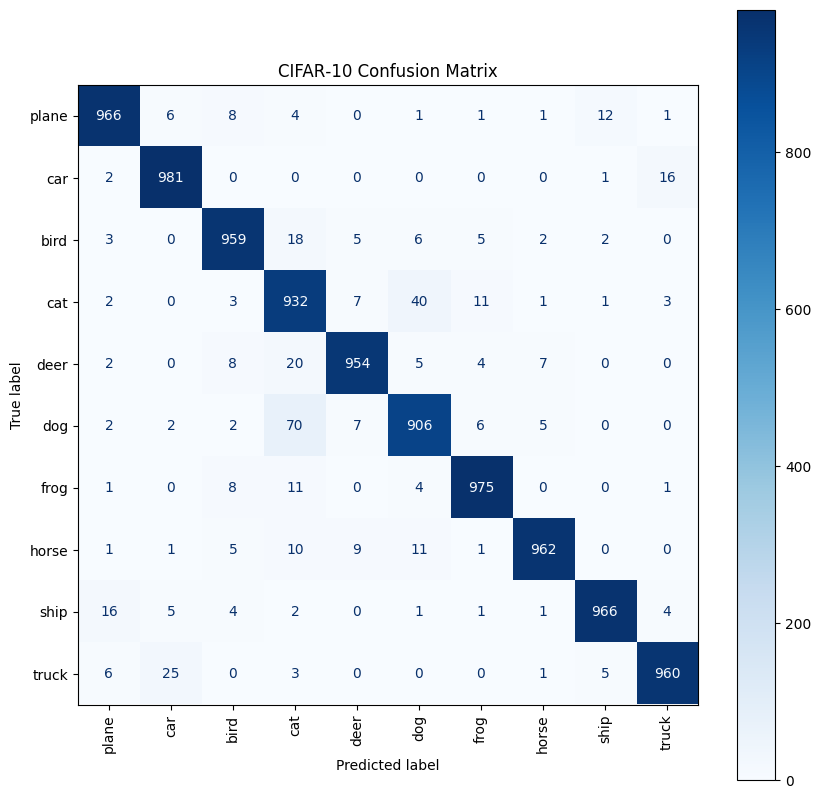

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# Classification report (Precision／Recall／F1)
print("\nClassification Report:\n",
      classification_report(y_true, y_pred, target_names=names, digits=4))

# 混同行列の計算と可視化
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title("CIFAR‑10 Confusion Matrix")
plt.show()

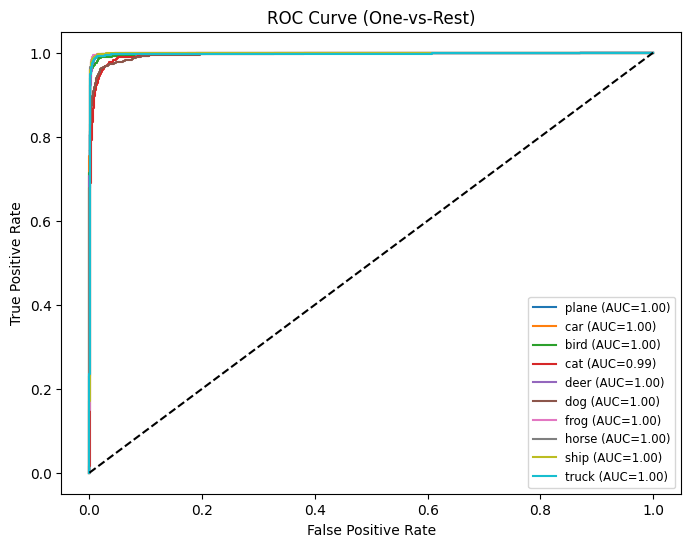

In [ ]:
# y_true を one-hot 表現に変換
y_true_bin = label_binarize(y_true, classes=list(range(10)))

# ROC 曲線・AUC
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_score[:, i])

# プロット
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{names[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right', fontsize='small')
plt.show()

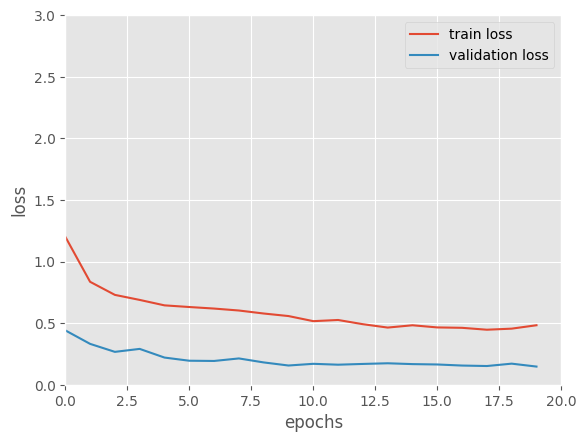

In [ ]:
plt.style.use("ggplot")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim(0,20)
plt.ylim(0,3)
plt.legend()

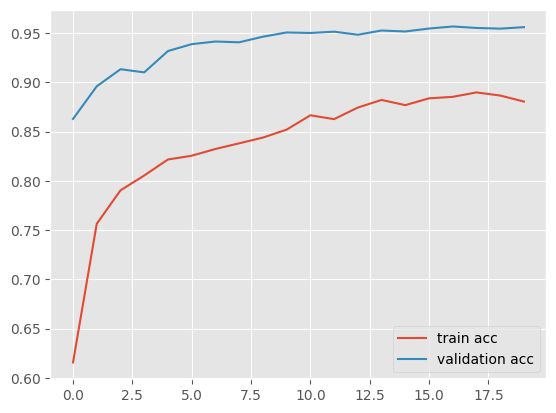

In [ ]:
plt.plot([accs_.cpu() for accs_ in accs], label="train acc")
plt.plot(val_accs, label="validation acc")
plt.legend()

## ZCA + Flip+ Crop + Rotation 10 + Mixup 0.2 Dropout2
https://github.com/NERSC/pytorch-examples/blob/main/models/resnet_cifar10.py


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# class BasicBlock(nn.Module):
    # expansion = 1

    # def __init__(self, in_planes, planes, stride=1):
    #     super(BasicBlock, self).__init__()
    #     self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
    #     self.bn1 = nn.BatchNorm2d(planes)
    #     self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
    #     self.bn2 = nn.BatchNorm2d(planes)

    #     self.shortcut = nn.Sequential()
    #     if stride != 1 or in_planes != self.expansion*planes:
    #         self.shortcut = nn.Sequential(
    #             nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
    #             nn.BatchNorm2d(self.expansion*planes)
    #         )

    # def forward(self, x):
    #     out = F.relu(self.bn1(self.conv1(x)))
    #     out = self.bn2(self.conv2(out))
    #     out += self.shortcut(x)
    #     out = F.relu(out)
    #     return out

class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1, dropout_rate=0.3):
        super(Bottleneck, self).__init__()
        self.relu = nn.ReLU(inplace=True)
        self.dropout = nn.Dropout(p=dropout_rate)
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion*planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        identity = self.shortcut(x)
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.dropout(out)

        out = self.bn3(self.conv3(out))
        out += identity  # チャンネル数一致
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, dropout_rate=0.3, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.Identity()

        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1, dropout_rate=dropout_rate)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2, dropout_rate=dropout_rate)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2, dropout_rate=dropout_rate)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2, dropout_rate=dropout_rate)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride, dropout_rate=0.3):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride, dropout_rate=dropout_rate))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)
        return x


def ResNet50():
    return ResNet(Bottleneck, [3,4,6,3])

model = ResNet50().to(device)

In [ ]:
class ZCAWhitening():
    def __init__(self, epsilon=1e-4, device="cuda"):
        self.epsilon = epsilon
        self.device = device

    def fit(self, images):  # 変換行列と平均をデータから計算
        x = images[0][0].reshape(1, -1)  # 画像（1枚）を1次元化
        self.mean = torch.zeros([1, x.size()[1]]).to(self.device)  # 平均値を格納するテンソル．xと同じ形状
        con_matrix = torch.zeros([x.size()[1], x.size()[1]]).to(self.device)
        for i in range(len(images)):  # 各データについての平均を取る
            x = images[i][0].reshape(1, -1).to(self.device)
            self.mean += x / len(images)
            con_matrix += torch.mm(x.t(), x) / len(images)
            if i % 10000 == 0:
                print("{0}/{1}".format(i, len(images)))
        con_matrix -= torch.mm(self.mean.t(), self.mean)
        # E: 固有値 V: 固有ベクトルを並べたもの
        E, V = torch.linalg.eigh(con_matrix)  # 固有値分解
        self.ZCA_matrix = torch.mm(torch.mm(V, torch.diag((E.squeeze()+self.epsilon)**(-0.5))), V.t())  # A(\Lambda + \epsilon I)^{1/2}A^T
        print("completed!")

    def __call__(self, x):
        size = x.size()
        x = x.reshape(1, -1).to(self.device)
        x -= self.mean  # x - \bar{x}
        x = torch.mm(x, self.ZCA_matrix.t())
        x = x.reshape(tuple(size))
        x = x.to("cpu")
        return x

zca = ZCAWhitening()
raw_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
zca.fit(raw_dataset)

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    zca
])


val_transform = transforms.Compose([
    transforms.ToTensor(),
    zca
])

raw_dataset =datasets.CIFAR10(root="./data", train=False, download=True, transform=None)
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
validation_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

100%|██████████| 170M/170M [00:13<00:00, 12.7MB/s]


0/50000
10000/50000
20000/50000
30000/50000
40000/50000
completed!


In [ ]:
names = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
data_iter = iter(train_dataloader)
imgs, labels = next(data_iter)

In [ ]:
def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

In [ ]:
from torch.autograd import Variable
from tqdm import tqdm
num_epochs=20
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_acc = 0.0

    for imgs, labels in tqdm(train_dataloader):
        imgs = imgs.to(device)
        labels = labels.to(device)

        lam = np.random.beta(0.2, 0.2)
        perm = torch.randperm(imgs.size(0)).to(device)

        mixed_imgs = lam * imgs + (1 - lam) * imgs[perm]
        targets_a = labels
        targets_b = labels[perm]

        optimizer.zero_grad()
        output = model(mixed_imgs)
        loss = mixup_criterion(criterion, output, targets_a, targets_b, lam)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        correct = lam * pred.eq(targets_a).float().mean() + (1 - lam) * pred.eq(targets_b).float().mean()
        running_acc += correct

    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)

#validation
    model.eval()
    y_true, y_pred, y_score = [], [], []
    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = model(val_imgs)
        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc += torch.mean(val_pred.eq(val_labels).float()).item()

        probs = F.softmax(val_output, dim=1).cpu().detach().numpy()
        preds = np.argmax(probs, axis=1)

        y_true.extend(val_labels.cpu().numpy())
        y_pred.extend(preds)
        y_score.extend(probs)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_score = np.array(y_score)


    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)

    print("epoch: {}, loss: {}, acc: {}, val loss: {}, val acc: {}".format(epoch, running_loss, running_acc, val_running_loss, val_running_acc))
    scheduler.step()

acc = accuracy_score(y_true, y_pred)
recall_macro = recall_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy       : {acc:.4f}')
print(f'Precision (macro): {precision_macro:.4f}')
print(f'Recall (macro)   : {recall_macro:.4f}')
print(f'F1 Score (macro): {f1_macro:.4f}')

100%|██████████| 1563/1563 [01:36<00:00, 16.16it/s]


epoch: 0, loss: 2.5781833449770684, acc: 0.10106305032968521, val loss: 2.3639641417482027, val acc: 0.1007388178913738


100%|██████████| 1563/1563 [01:36<00:00, 16.28it/s]


epoch: 1, loss: 2.5739322097653847, acc: 0.09937354177236557, val loss: 2.3631954345459376, val acc: 0.1009384984025559


100%|██████████| 1563/1563 [01:35<00:00, 16.29it/s]


epoch: 2, loss: 2.573224317089381, acc: 0.10254539549350739, val loss: 2.366123752472119, val acc: 0.10003993610223642


100%|██████████| 1563/1563 [01:35<00:00, 16.33it/s]


epoch: 3, loss: 2.5753295270586656, acc: 0.10043651610612869, val loss: 2.361797002176888, val acc: 0.10123801916932908


100%|██████████| 1563/1563 [01:35<00:00, 16.29it/s]


epoch: 4, loss: 2.575064998365562, acc: 0.10066456347703934, val loss: 2.3629345627257616, val acc: 0.10173722044728435


100%|██████████| 1563/1563 [01:35<00:00, 16.34it/s]


epoch: 5, loss: 2.572459143701457, acc: 0.1022067591547966, val loss: 2.364791419178533, val acc: 0.09994009584664537


100%|██████████| 1563/1563 [01:35<00:00, 16.32it/s]


epoch: 6, loss: 2.5730374910399765, acc: 0.10088755190372467, val loss: 2.363687078792828, val acc: 0.10153753993610223


100%|██████████| 1563/1563 [01:35<00:00, 16.45it/s]


epoch: 7, loss: 2.5704489394936587, acc: 0.10130531340837479, val loss: 2.364457051213176, val acc: 0.1018370607028754


100%|██████████| 1563/1563 [01:35<00:00, 16.35it/s]


epoch: 8, loss: 2.5746429483629694, acc: 0.10214453935623169, val loss: 2.366364921624668, val acc: 0.10023961661341853


100%|██████████| 1563/1563 [01:35<00:00, 16.39it/s]


epoch: 9, loss: 2.5737935261168086, acc: 0.10169593244791031, val loss: 2.361021651246677, val acc: 0.10133785942492013


100%|██████████| 1563/1563 [01:35<00:00, 16.36it/s]


epoch: 10, loss: 2.5750617088603422, acc: 0.1015750914812088, val loss: 2.3661007058506196, val acc: 0.10133785942492013


100%|██████████| 1563/1563 [01:35<00:00, 16.34it/s]


epoch: 11, loss: 2.5754231680530197, acc: 0.10173334181308746, val loss: 2.363283880983298, val acc: 0.10063897763578275


100%|██████████| 1563/1563 [01:35<00:00, 16.34it/s]


epoch: 12, loss: 2.5755508432614063, acc: 0.10261553525924683, val loss: 2.3632121139441056, val acc: 0.10133785942492013


100%|██████████| 1563/1563 [01:35<00:00, 16.31it/s]


epoch: 13, loss: 2.572925082552685, acc: 0.10019879788160324, val loss: 2.36391774991069, val acc: 0.10143769968051118


100%|██████████| 1563/1563 [01:35<00:00, 16.29it/s]


epoch: 14, loss: 2.572715541146462, acc: 0.10179361701011658, val loss: 2.3647238758806224, val acc: 0.10133785942492013


100%|██████████| 1563/1563 [01:36<00:00, 16.26it/s]


epoch: 15, loss: 2.570282265229326, acc: 0.1021851897239685, val loss: 2.362406010825794, val acc: 0.10173722044728435


100%|██████████| 1563/1563 [01:35<00:00, 16.28it/s]


epoch: 16, loss: 2.5762247996534664, acc: 0.10097389668226242, val loss: 2.3615889465466093, val acc: 0.10143769968051118


100%|██████████| 1563/1563 [01:35<00:00, 16.36it/s]


epoch: 17, loss: 2.574958493903289, acc: 0.09932700544595718, val loss: 2.364225462221871, val acc: 0.10173722044728435


100%|██████████| 1563/1563 [01:36<00:00, 16.26it/s]


epoch: 18, loss: 2.5748366589585863, acc: 0.10239667445421219, val loss: 2.36411301015665, val acc: 0.10063897763578275


100%|██████████| 1563/1563 [01:35<00:00, 16.29it/s]


epoch: 19, loss: 2.573989176094265, acc: 0.1013793870806694, val loss: 2.363244490882459, val acc: 0.10083865814696485
Accuracy       : 0.1008
Precision (macro): 0.0569
Recall (macro)   : 0.1008
F1 Score (macro): 0.0309


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9561

Classification Report:
               precision    recall  f1-score   support

       plane     0.9650    0.9660    0.9655      1000
         car     0.9618    0.9810    0.9713      1000
        bird     0.9619    0.9590    0.9604      1000
         cat     0.8710    0.9320    0.9005      1000
        deer     0.9715    0.9540    0.9627      1000
         dog     0.9302    0.9060    0.9179      1000
        frog     0.9711    0.9750    0.9731      1000
       horse     0.9816    0.9620    0.9717      1000
        ship     0.9787    0.9660    0.9723      1000
       truck     0.9746    0.9600    0.9673      1000

    accuracy                         0.9561     10000
   macro avg     0.9567    0.9561    0.9563     10000
weighted avg     0.9567    0.9561    0.9563     10000



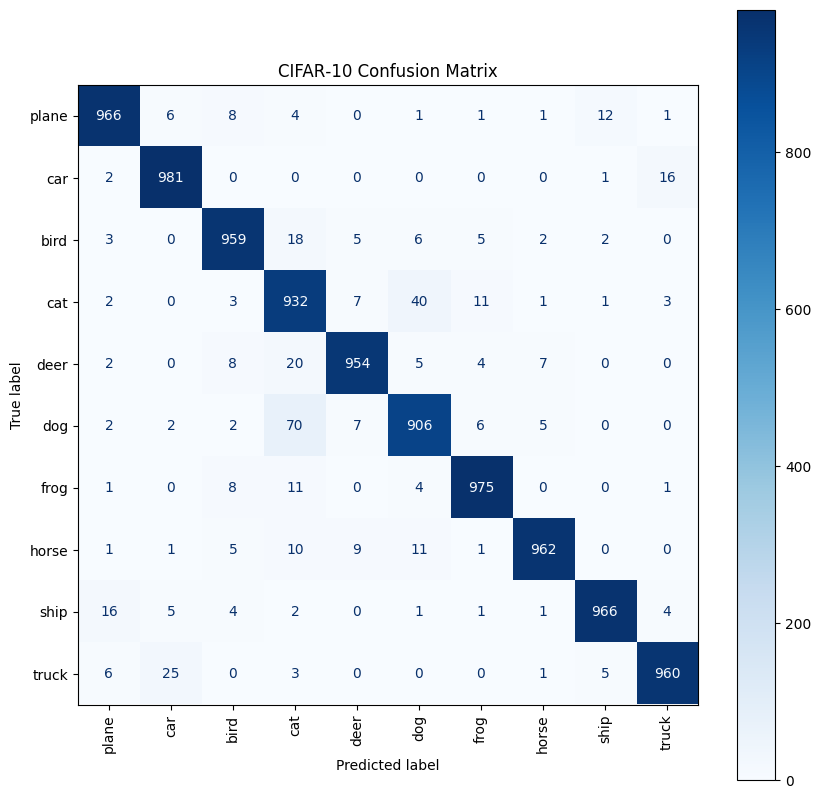

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# Classification report (Precision／Recall／F1)
print("\nClassification Report:\n",
      classification_report(y_true, y_pred, target_names=names, digits=4))

# 混同行列の計算と可視化
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title("CIFAR‑10 Confusion Matrix")
plt.show()

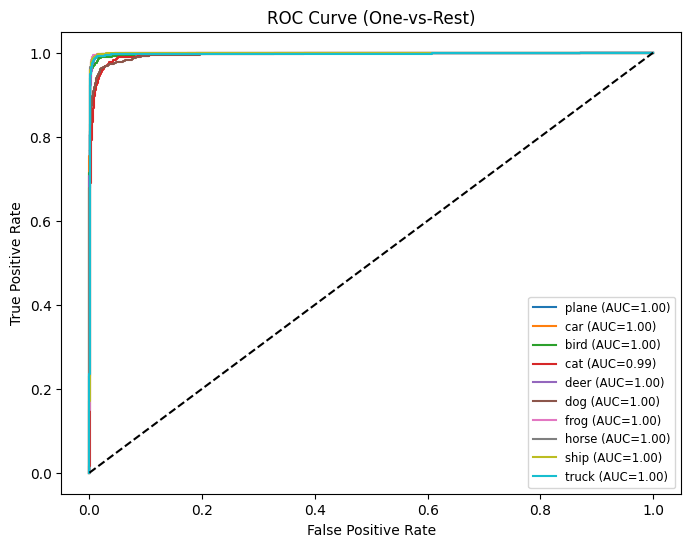

In [ ]:
# y_true を one-hot 表現に変換
y_true_bin = label_binarize(y_true, classes=list(range(10)))

# ROC 曲線・AUC
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_score[:, i])

# プロット
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{names[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right', fontsize='small')
plt.show()

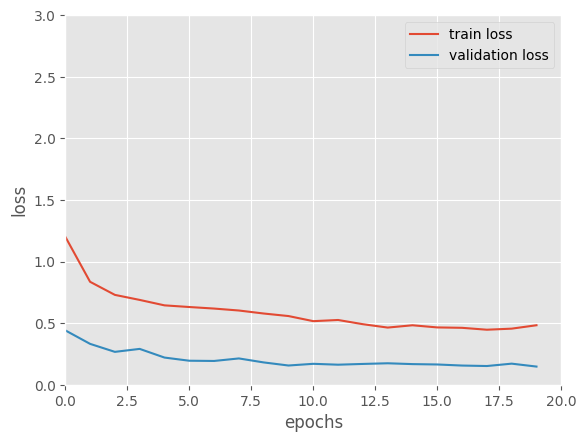

In [ ]:
plt.style.use("ggplot")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim(0,20)
plt.ylim(0,3)
plt.legend()

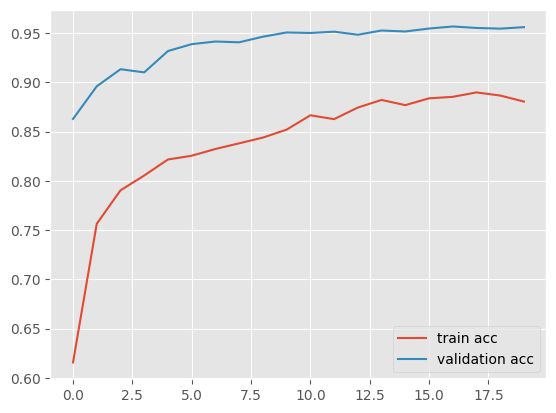

In [ ]:
plt.plot([accs_.cpu() for accs_ in accs], label="train acc")
plt.plot(val_accs, label="validation acc")
plt.legend()

## ZCA+GCN+Mixup+Flip+Rotation+Crop

In [ ]:
class gcn():
    def __init__(self):
        pass

    def __call__(self, x):
        mean = torch.mean(x)
        std = torch.std(x)
        return (x - mean)/(std + 10**(-6))  # 0除算を防ぐ


# 標準化後の画像を[0, 1]に正規化する
def deprocess(x):
    _min = np.min(x)
    _max = np.max(x)
    _x = (x - _min)/(_max - _min)
    return _x

In [ ]:
class ZCAWhitening():
    def __init__(self, epsilon=1e-4, device="cuda"):
        self.epsilon = epsilon
        self.device = device

    def fit(self, images):  # 変換行列と平均をデータから計算
        x = images[0][0].reshape(1, -1)  # 画像（1枚）を1次元化
        self.mean = torch.zeros([1, x.size()[1]]).to(self.device)  # 平均値を格納するテンソル．xと同じ形状
        con_matrix = torch.zeros([x.size()[1], x.size()[1]]).to(self.device)
        for i in range(len(images)):  # 各データについての平均を取る
            x = images[i][0].reshape(1, -1).to(self.device)
            self.mean += x / len(images)
            con_matrix += torch.mm(x.t(), x) / len(images)
            if i % 10000 == 0:
                print("{0}/{1}".format(i, len(images)))
        con_matrix -= torch.mm(self.mean.t(), self.mean)
        # E: 固有値 V: 固有ベクトルを並べたもの
        E, V = torch.linalg.eigh(con_matrix)  # 固有値分解
        self.ZCA_matrix = torch.mm(torch.mm(V, torch.diag((E.squeeze()+self.epsilon)**(-0.5))), V.t())  # A(\Lambda + \epsilon I)^{1/2}A^T
        print("completed!")

    def __call__(self, x):
        size = x.size()
        x = x.reshape(1, -1).to(self.device)
        x -= self.mean  # x - \bar{x}
        x = torch.mm(x, self.ZCA_matrix.t())
        x = x.reshape(tuple(size))
        x = x.to("cpu")
        return x

zca = ZCAWhitening()
zca_raw_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
zca.fit(zca_raw_dataset)

GCN = gcn()


train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    GCN,
    zca,
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  # CIFAR-10の平均
                         std=[0.2023, 0.1994, 0.2010])   # CIFAR-10の標準偏差
])


val_transform = transforms.Compose([
    transforms.ToTensor(),
    GCN,
    zca,
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  # CIFAR-10の平均
                         std=[0.2023, 0.1994, 0.2010])   # CIFAR-10の標準偏差
])

raw_dataset =datasets.CIFAR10(root="./data", train=False, download=False, transform=None)
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
validation_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

0/50000
10000/50000
20000/50000
30000/50000
40000/50000
completed!


In [ ]:
names = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
data_iter = iter(train_dataloader)
imgs, labels = next(data_iter)

In [ ]:
def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

In [ ]:
from torch.autograd import Variable
from tqdm import tqdm
num_epochs=20
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_acc = 0.0

    for imgs, labels in tqdm(train_dataloader):
        imgs = imgs.to(device)
        labels = labels.to(device)

        lam = np.random.beta(0.2, 0.2)
        perm = torch.randperm(imgs.size(0)).to(device)

        mixed_imgs = lam * imgs + (1 - lam) * imgs[perm]
        targets_a = labels
        targets_b = labels[perm]

        optimizer.zero_grad()
        output = model(mixed_imgs)
        loss = mixup_criterion(criterion, output, targets_a, targets_b, lam)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        correct = lam * pred.eq(targets_a).float().mean() + (1 - lam) * pred.eq(targets_b).float().mean()
        running_acc += correct

    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)

#validation
    model.eval()
    y_true, y_pred, y_score = [], [], []
    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = model(val_imgs)
        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc += torch.mean(val_pred.eq(val_labels).float()).item()

        probs = F.softmax(val_output, dim=1).cpu().detach().numpy()
        preds = np.argmax(probs, axis=1)

        y_true.extend(val_labels.cpu().numpy())
        y_pred.extend(preds)
        y_score.extend(probs)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_score = np.array(y_score)


    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)

    print("epoch: {}, loss: {}, acc: {}, val loss: {}, val acc: {}".format(epoch, running_loss, running_acc, val_running_loss, val_running_acc))
    scheduler.step()

acc = accuracy_score(y_true, y_pred)
recall_macro = recall_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy       : {acc:.4f}')
print(f'Precision (macro): {precision_macro:.4f}')
print(f'Recall (macro)   : {recall_macro:.4f}')
print(f'F1 Score (macro): {f1_macro:.4f}')

100%|██████████| 1563/1563 [01:48<00:00, 14.46it/s]


epoch: 0, loss: 1.2073044931457657, acc: 0.6075608730316162, val loss: 0.5365004738489279, val acc: 0.8353634185303515


100%|██████████| 1563/1563 [01:47<00:00, 14.60it/s]


epoch: 1, loss: 0.7940032972560352, acc: 0.7636584639549255, val loss: 0.3344045955294999, val acc: 0.8993610223642172


100%|██████████| 1563/1563 [01:46<00:00, 14.62it/s]


epoch: 2, loss: 0.7239421192015583, acc: 0.7871901988983154, val loss: 0.3197110777322096, val acc: 0.9141373801916933


100%|██████████| 1563/1563 [01:47<00:00, 14.54it/s]


epoch: 3, loss: 0.6787965776671679, acc: 0.8075743913650513, val loss: 0.2698809631383076, val acc: 0.917332268370607


100%|██████████| 1563/1563 [01:47<00:00, 14.53it/s]


epoch: 4, loss: 0.6378219316088459, acc: 0.8200914859771729, val loss: 0.24669139208599403, val acc: 0.9222244408945687


100%|██████████| 1563/1563 [01:47<00:00, 14.58it/s]


epoch: 5, loss: 0.6128649562049088, acc: 0.8281846046447754, val loss: 0.22346243355125664, val acc: 0.9323083067092651


100%|██████████| 1563/1563 [01:47<00:00, 14.56it/s]


epoch: 6, loss: 0.5742533224755785, acc: 0.8442797660827637, val loss: 0.21953971517947726, val acc: 0.9303115015974441


100%|██████████| 1563/1563 [01:48<00:00, 14.37it/s]


epoch: 7, loss: 0.5439801438653785, acc: 0.8538198471069336, val loss: 0.21034592490036266, val acc: 0.9370007987220448


100%|██████████| 1563/1563 [01:50<00:00, 14.20it/s]


epoch: 8, loss: 0.5534507642331475, acc: 0.850574791431427, val loss: 0.2072735948089403, val acc: 0.9367012779552716


100%|██████████| 1563/1563 [01:48<00:00, 14.42it/s]


epoch: 9, loss: 0.5309238462158915, acc: 0.860322117805481, val loss: 0.18736441387607458, val acc: 0.9423921725239617


100%|██████████| 1563/1563 [01:48<00:00, 14.45it/s]


epoch: 10, loss: 0.5153336816307059, acc: 0.8658605217933655, val loss: 0.19070235595773585, val acc: 0.9422923322683706


100%|██████████| 1563/1563 [01:47<00:00, 14.50it/s]


epoch: 11, loss: 0.49922888145453737, acc: 0.8699305057525635, val loss: 0.18938654312453332, val acc: 0.9477835463258786


100%|██████████| 1563/1563 [01:47<00:00, 14.55it/s]


epoch: 12, loss: 0.4982854121895561, acc: 0.870765209197998, val loss: 0.1908423301344291, val acc: 0.9500798722044729


100%|██████████| 1563/1563 [01:47<00:00, 14.58it/s]


epoch: 13, loss: 0.48495937535606004, acc: 0.8757033944129944, val loss: 0.1612022493284541, val acc: 0.9531749201277955


100%|██████████| 1563/1563 [01:47<00:00, 14.59it/s]


epoch: 14, loss: 0.4652507741862857, acc: 0.8793105483055115, val loss: 0.1730269570343982, val acc: 0.9512779552715654


100%|██████████| 1563/1563 [01:46<00:00, 14.61it/s]


epoch: 15, loss: 0.453173102008957, acc: 0.8839582800865173, val loss: 0.21991591076976574, val acc: 0.9496805111821086


100%|██████████| 1563/1563 [01:47<00:00, 14.59it/s]


epoch: 16, loss: 0.4604415267497964, acc: 0.8821414709091187, val loss: 0.15703420000620924, val acc: 0.9532747603833865


100%|██████████| 1563/1563 [01:46<00:00, 14.63it/s]


epoch: 17, loss: 0.4478377099129564, acc: 0.8884406089782715, val loss: 0.21371132340103674, val acc: 0.9516773162939297


100%|██████████| 1563/1563 [01:47<00:00, 14.56it/s]


epoch: 18, loss: 0.4664590353310354, acc: 0.879956841468811, val loss: 0.1693663664590627, val acc: 0.954173322683706


100%|██████████| 1563/1563 [01:47<00:00, 14.54it/s]


epoch: 19, loss: 0.44705624244639425, acc: 0.886987566947937, val loss: 0.16166989000055926, val acc: 0.9549720447284346
Accuracy       : 0.9549
Precision (macro): 0.9550
Recall (macro)   : 0.9549
F1 Score (macro): 0.9549


Accuracy: 0.9549

Classification Report:
               precision    recall  f1-score   support

       plane     0.9600    0.9590    0.9595      1000
         car     0.9611    0.9880    0.9744      1000
        bird     0.9424    0.9490    0.9457      1000
         cat     0.8977    0.9130    0.9053      1000
        deer     0.9662    0.9440    0.9550      1000
         dog     0.9296    0.9240    0.9268      1000
        frog     0.9721    0.9750    0.9735      1000
       horse     0.9730    0.9730    0.9730      1000
        ship     0.9747    0.9650    0.9698      1000
       truck     0.9736    0.9590    0.9662      1000

    accuracy                         0.9549     10000
   macro avg     0.9550    0.9549    0.9549     10000
weighted avg     0.9550    0.9549    0.9549     10000



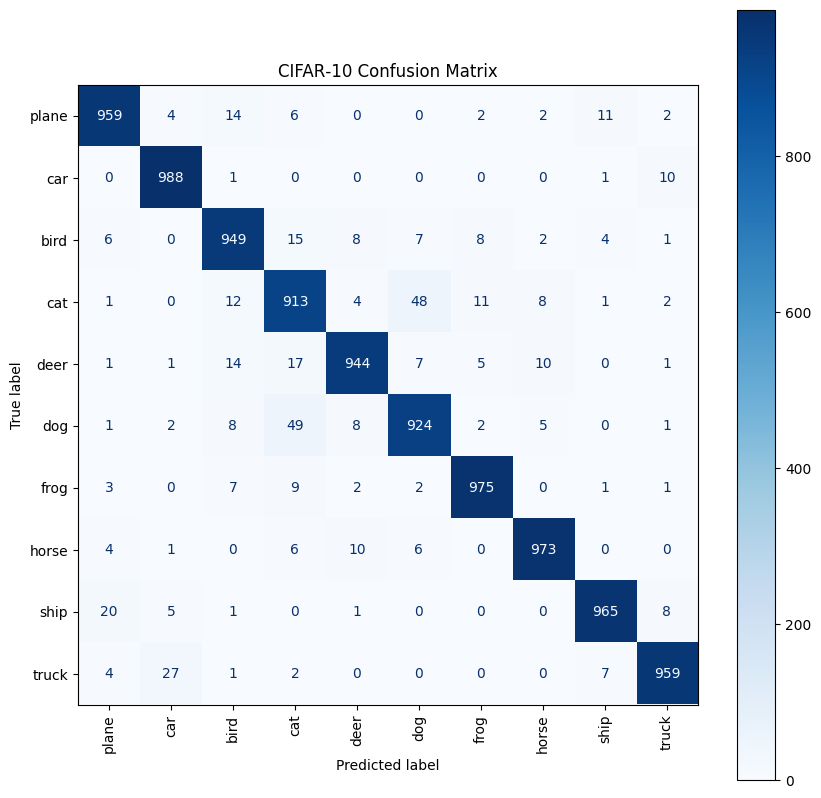

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# Classification report (Precision／Recall／F1)
print("\nClassification Report:\n",
      classification_report(y_true, y_pred, target_names=names, digits=4))

# 混同行列の計算と可視化
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title("CIFAR‑10 Confusion Matrix")
plt.show()

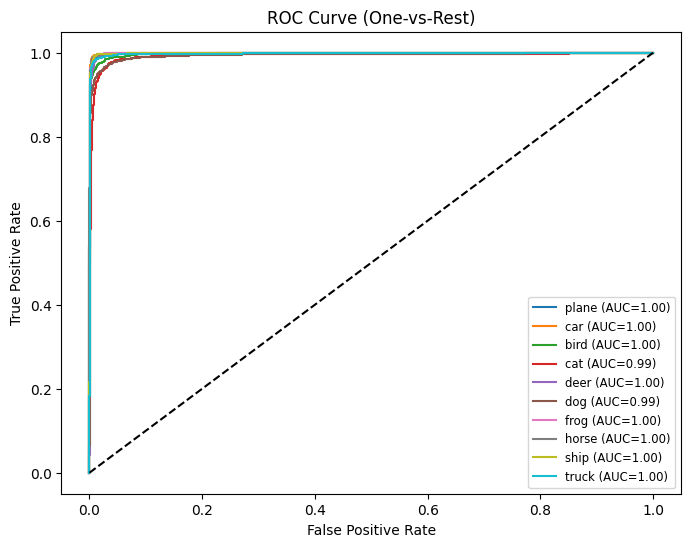

In [ ]:
# y_true を one-hot 表現に変換
y_true_bin = label_binarize(y_true, classes=list(range(10)))

# ROC 曲線・AUC
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_score[:, i])

# プロット
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{names[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right', fontsize='small')
plt.show()

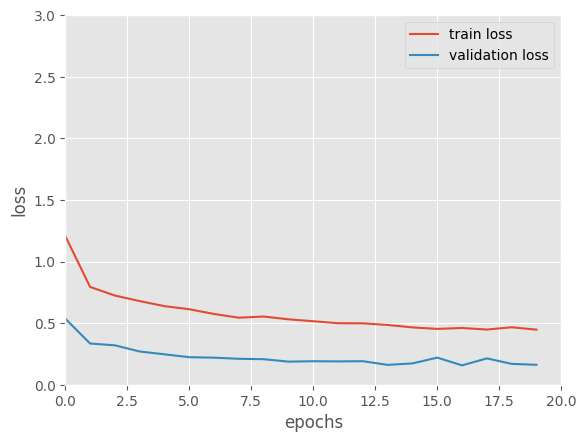

In [ ]:
plt.style.use("ggplot")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim(0,20)
plt.ylim(0,3)
plt.legend()

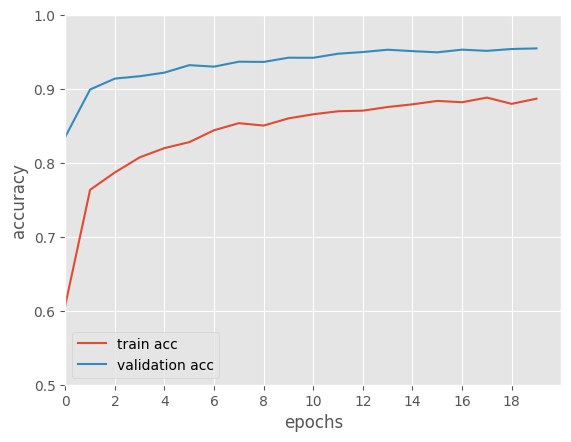

In [ ]:
plt.plot([accs_.cpu() for accs_ in accs], label="train acc")
plt.plot(val_accs, label="validation acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xlim(0,20)
plt.ylim(0.5,1)
plt.xticks(range(0, 19, 2))
plt.legend()

## ZCA+GCN+Mixup+Flip+Rotation+Crop+Gausian


In [ ]:
class gcn():
    def __init__(self):
        pass

    def __call__(self, x):
        mean = torch.mean(x)
        std = torch.std(x)
        return (x - mean)/(std + 10**(-6))  # 0除算を防ぐ


# 標準化後の画像を[0, 1]に正規化する
def deprocess(x):
    _min = np.min(x)
    _max = np.max(x)
    _x = (x - _min)/(_max - _min)
    return _x

In [ ]:
class ZCAWhitening():
    def __init__(self, epsilon=1e-4, device="cuda"):
        self.epsilon = epsilon
        self.device = device

    def fit(self, images):  # 変換行列と平均をデータから計算
        x = images[0][0].reshape(1, -1)  # 画像（1枚）を1次元化
        self.mean = torch.zeros([1, x.size()[1]]).to(self.device)  # 平均値を格納するテンソル．xと同じ形状
        con_matrix = torch.zeros([x.size()[1], x.size()[1]]).to(self.device)
        for i in range(len(images)):  # 各データについての平均を取る
            x = images[i][0].reshape(1, -1).to(self.device)
            self.mean += x / len(images)
            con_matrix += torch.mm(x.t(), x) / len(images)
            if i % 10000 == 0:
                print("{0}/{1}".format(i, len(images)))
        con_matrix -= torch.mm(self.mean.t(), self.mean)
        # E: 固有値 V: 固有ベクトルを並べたもの
        E, V = torch.linalg.eigh(con_matrix)  # 固有値分解
        self.ZCA_matrix = torch.mm(torch.mm(V, torch.diag((E.squeeze()+self.epsilon)**(-0.5))), V.t())  # A(\Lambda + \epsilon I)^{1/2}A^T
        print("completed!")

    def __call__(self, x):
        size = x.size()
        x = x.reshape(1, -1).to(self.device)
        x -= self.mean  # x - \bar{x}
        x = torch.mm(x, self.ZCA_matrix.t())
        x = x.reshape(tuple(size))
        x = x.to("cpu")
        return x

zca = ZCAWhitening()
zca_raw_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
zca.fit(zca_raw_dataset)

GCN = gcn()


train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    GCN,
    zca,
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  # CIFAR-10の平均
                         std=[0.2023, 0.1994, 0.2010])   # CIFAR-10の標準偏差
])


val_transform = transforms.Compose([
    transforms.ToTensor(),
    GCN,
    zca,
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  # CIFAR-10の平均
                         std=[0.2023, 0.1994, 0.2010])   # CIFAR-10の標準偏差
])

raw_dataset =datasets.CIFAR10(root="./data", train=False, download=False, transform=None)
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
validation_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

100%|██████████| 170M/170M [00:03<00:00, 43.4MB/s]


0/50000


KeyboardInterrupt: 

In [ ]:
names = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
data_iter = iter(train_dataloader)
imgs, labels = next(data_iter)

In [ ]:
def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

In [ ]:
from torch.autograd import Variable
from tqdm import tqdm
num_epochs=20
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_acc = 0.0

    for imgs, labels in tqdm(train_dataloader):
        imgs = imgs.to(device)
        labels = labels.to(device)

        lam = np.random.beta(0.2, 0.2)
        perm = torch.randperm(imgs.size(0)).to(device)

        mixed_imgs = lam * imgs + (1 - lam) * imgs[perm]
        targets_a = labels
        targets_b = labels[perm]

        optimizer.zero_grad()
        output = model(mixed_imgs)
        loss = mixup_criterion(criterion, output, targets_a, targets_b, lam)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        correct = lam * pred.eq(targets_a).float().mean() + (1 - lam) * pred.eq(targets_b).float().mean()
        running_acc += correct

    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)

#validation
    model.eval()
    y_true, y_pred, y_score = [], [], []
    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = model(val_imgs)
        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc += torch.mean(val_pred.eq(val_labels).float()).item()

        probs = F.softmax(val_output, dim=1).cpu().detach().numpy()
        preds = np.argmax(probs, axis=1)

        y_true.extend(val_labels.cpu().numpy())
        y_pred.extend(preds)
        y_score.extend(probs)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_score = np.array(y_score)


    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)

    print("epoch: {}, loss: {}, acc: {}, val loss: {}, val acc: {}".format(epoch, running_loss, running_acc, val_running_loss, val_running_acc))
    scheduler.step()

acc = accuracy_score(y_true, y_pred)
recall_macro = recall_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy       : {acc:.4f}')
print(f'Precision (macro): {precision_macro:.4f}')
print(f'Recall (macro)   : {recall_macro:.4f}')
print(f'F1 Score (macro): {f1_macro:.4f}')

100%|██████████| 1563/1563 [01:48<00:00, 14.46it/s]


epoch: 0, loss: 1.2073044931457657, acc: 0.6075608730316162, val loss: 0.5365004738489279, val acc: 0.8353634185303515


100%|██████████| 1563/1563 [01:47<00:00, 14.60it/s]


epoch: 1, loss: 0.7940032972560352, acc: 0.7636584639549255, val loss: 0.3344045955294999, val acc: 0.8993610223642172


100%|██████████| 1563/1563 [01:46<00:00, 14.62it/s]


epoch: 2, loss: 0.7239421192015583, acc: 0.7871901988983154, val loss: 0.3197110777322096, val acc: 0.9141373801916933


100%|██████████| 1563/1563 [01:47<00:00, 14.54it/s]


epoch: 3, loss: 0.6787965776671679, acc: 0.8075743913650513, val loss: 0.2698809631383076, val acc: 0.917332268370607


100%|██████████| 1563/1563 [01:47<00:00, 14.53it/s]


epoch: 4, loss: 0.6378219316088459, acc: 0.8200914859771729, val loss: 0.24669139208599403, val acc: 0.9222244408945687


100%|██████████| 1563/1563 [01:47<00:00, 14.58it/s]


epoch: 5, loss: 0.6128649562049088, acc: 0.8281846046447754, val loss: 0.22346243355125664, val acc: 0.9323083067092651


100%|██████████| 1563/1563 [01:47<00:00, 14.56it/s]


epoch: 6, loss: 0.5742533224755785, acc: 0.8442797660827637, val loss: 0.21953971517947726, val acc: 0.9303115015974441


100%|██████████| 1563/1563 [01:48<00:00, 14.37it/s]


epoch: 7, loss: 0.5439801438653785, acc: 0.8538198471069336, val loss: 0.21034592490036266, val acc: 0.9370007987220448


100%|██████████| 1563/1563 [01:50<00:00, 14.20it/s]


epoch: 8, loss: 0.5534507642331475, acc: 0.850574791431427, val loss: 0.2072735948089403, val acc: 0.9367012779552716


100%|██████████| 1563/1563 [01:48<00:00, 14.42it/s]


epoch: 9, loss: 0.5309238462158915, acc: 0.860322117805481, val loss: 0.18736441387607458, val acc: 0.9423921725239617


100%|██████████| 1563/1563 [01:48<00:00, 14.45it/s]


epoch: 10, loss: 0.5153336816307059, acc: 0.8658605217933655, val loss: 0.19070235595773585, val acc: 0.9422923322683706


100%|██████████| 1563/1563 [01:47<00:00, 14.50it/s]


epoch: 11, loss: 0.49922888145453737, acc: 0.8699305057525635, val loss: 0.18938654312453332, val acc: 0.9477835463258786


100%|██████████| 1563/1563 [01:47<00:00, 14.55it/s]


epoch: 12, loss: 0.4982854121895561, acc: 0.870765209197998, val loss: 0.1908423301344291, val acc: 0.9500798722044729


100%|██████████| 1563/1563 [01:47<00:00, 14.58it/s]


epoch: 13, loss: 0.48495937535606004, acc: 0.8757033944129944, val loss: 0.1612022493284541, val acc: 0.9531749201277955


100%|██████████| 1563/1563 [01:47<00:00, 14.59it/s]


epoch: 14, loss: 0.4652507741862857, acc: 0.8793105483055115, val loss: 0.1730269570343982, val acc: 0.9512779552715654


100%|██████████| 1563/1563 [01:46<00:00, 14.61it/s]


epoch: 15, loss: 0.453173102008957, acc: 0.8839582800865173, val loss: 0.21991591076976574, val acc: 0.9496805111821086


100%|██████████| 1563/1563 [01:47<00:00, 14.59it/s]


epoch: 16, loss: 0.4604415267497964, acc: 0.8821414709091187, val loss: 0.15703420000620924, val acc: 0.9532747603833865


100%|██████████| 1563/1563 [01:46<00:00, 14.63it/s]


epoch: 17, loss: 0.4478377099129564, acc: 0.8884406089782715, val loss: 0.21371132340103674, val acc: 0.9516773162939297


100%|██████████| 1563/1563 [01:47<00:00, 14.56it/s]


epoch: 18, loss: 0.4664590353310354, acc: 0.879956841468811, val loss: 0.1693663664590627, val acc: 0.954173322683706


100%|██████████| 1563/1563 [01:47<00:00, 14.54it/s]


epoch: 19, loss: 0.44705624244639425, acc: 0.886987566947937, val loss: 0.16166989000055926, val acc: 0.9549720447284346
Accuracy       : 0.9549
Precision (macro): 0.9550
Recall (macro)   : 0.9549
F1 Score (macro): 0.9549


Accuracy: 0.9549

Classification Report:
               precision    recall  f1-score   support

       plane     0.9600    0.9590    0.9595      1000
         car     0.9611    0.9880    0.9744      1000
        bird     0.9424    0.9490    0.9457      1000
         cat     0.8977    0.9130    0.9053      1000
        deer     0.9662    0.9440    0.9550      1000
         dog     0.9296    0.9240    0.9268      1000
        frog     0.9721    0.9750    0.9735      1000
       horse     0.9730    0.9730    0.9730      1000
        ship     0.9747    0.9650    0.9698      1000
       truck     0.9736    0.9590    0.9662      1000

    accuracy                         0.9549     10000
   macro avg     0.9550    0.9549    0.9549     10000
weighted avg     0.9550    0.9549    0.9549     10000



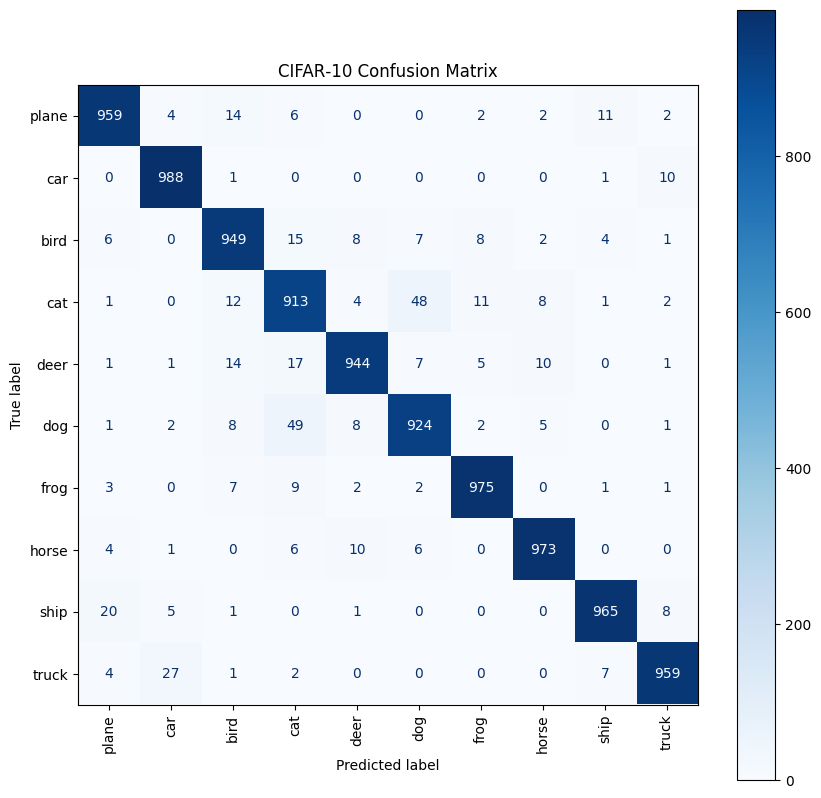

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# Classification report (Precision／Recall／F1)
print("\nClassification Report:\n",
      classification_report(y_true, y_pred, target_names=names, digits=4))

# 混同行列の計算と可視化
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title("CIFAR‑10 Confusion Matrix")
plt.show()

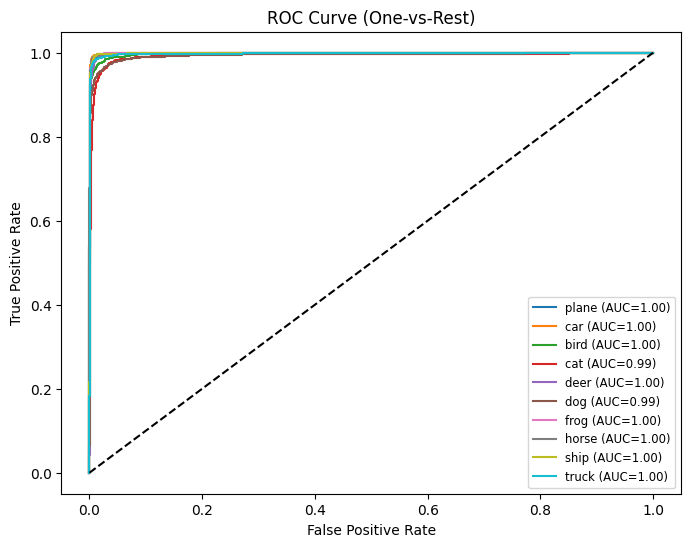

In [ ]:
# y_true を one-hot 表現に変換
y_true_bin = label_binarize(y_true, classes=list(range(10)))

# ROC 曲線・AUC
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_score[:, i])

# プロット
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{names[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right', fontsize='small')
plt.show()

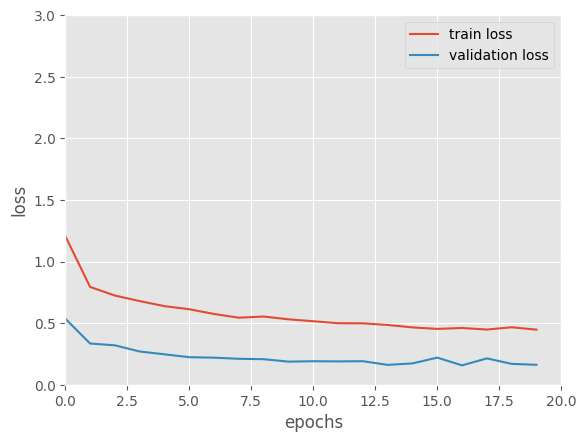

In [ ]:
plt.style.use("ggplot")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim(0,20)
plt.ylim(0,3)
plt.legend()

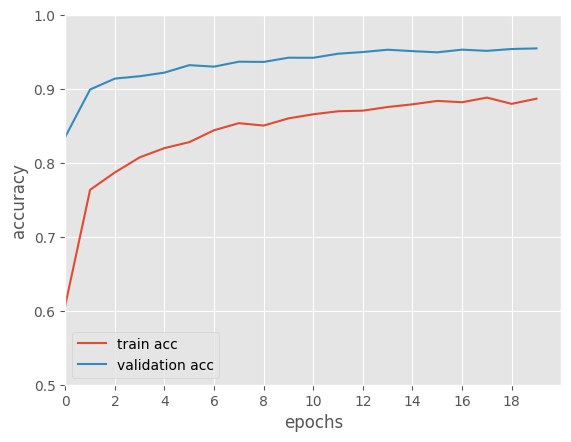

In [ ]:
plt.plot([accs_.cpu() for accs_ in accs], label="train acc")
plt.plot(val_accs, label="validation acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.xlim(0,20)
plt.ylim(0.5,1)
plt.xticks(range(0, 19, 2))
plt.legend()

##TTA


In [ ]:
class ZCAWhitening():
    def __init__(self, epsilon=1e-4, device="cuda"):
        self.epsilon = epsilon
        self.device = device

    def fit(self, images):  # 変換行列と平均をデータから計算
        x = images[0][0].reshape(1, -1)  # 画像（1枚）を1次元化
        self.mean = torch.zeros([1, x.size()[1]]).to(self.device)  # 平均値を格納するテンソル．xと同じ形状
        con_matrix = torch.zeros([x.size()[1], x.size()[1]]).to(self.device)
        for i in range(len(images)):  # 各データについての平均を取る
            x = images[i][0].reshape(1, -1).to(self.device)
            self.mean += x / len(images)
            con_matrix += torch.mm(x.t(), x) / len(images)
            if i % 10000 == 0:
                print("{0}/{1}".format(i, len(images)))
        con_matrix -= torch.mm(self.mean.t(), self.mean)
        # E: 固有値 V: 固有ベクトルを並べたもの
        E, V = torch.linalg.eigh(con_matrix)  # 固有値分解
        self.ZCA_matrix = torch.mm(torch.mm(V, torch.diag((E.squeeze()+self.epsilon)**(-0.5))), V.t())  # A(\Lambda + \epsilon I)^{1/2}A^T
        print("completed!")

    def __call__(self, x):
        size = x.size()
        x = x.reshape(1, -1).to(self.device)
        x -= self.mean  # x - \bar{x}
        x = torch.mm(x, self.ZCA_matrix.t())
        x = x.reshape(tuple(size))
        x = x.to("cpu")
        return x

zca = ZCAWhitening()
raw_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
zca.fit(raw_dataset)

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.2),
    transforms.ToTensor(),
    zca
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    zca
])

raw_dataset =datasets.CIFAR10(root="./data", train=False, download=True, transform=None)
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
validation_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

0/50000
10000/50000
20000/50000
30000/50000
40000/50000
completed!


In [ ]:
names = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
data_iter = iter(train_dataloader)
imgs, labels = next(data_iter)

In [ ]:
def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

In [ ]:
from torch.autograd import Variable
from tqdm import tqdm
tta_transforms = [
    transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  # CIFAR-10の平均
                        std=[0.2023, 0.1994, 0.2010])
    ]),
    transforms.Compose([
        transforms.RandomHorizontalFlip(p=1.0),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  # CIFAR-10の平均
                        std=[0.2023, 0.1994, 0.2010])
    ]),
    transforms.Compose([
        transforms.CenterCrop(28),
        transforms.Resize(32),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],  # CIFAR-10の平均
                        std=[0.2023, 0.1994, 0.2010])
    ]),
    transforms.Compose([
        transforms.ToTensor(),
        zca
    ]),

]

def predict_tta(model, dataset, transforms_list):
    model.eval()
    all_preds = []
    all_labels = []

    for i in range(len(dataset)):
        image, label = dataset[i]
        tta_outputs = []

        for t in transforms_list:
            img_aug = t(image).unsqueeze(0).to(device)
            with torch.no_grad():
                output = model(img_aug)
                probs = F.softmax(output, dim=1)
                tta_outputs.append(probs)

        avg_probs = torch.stack(tta_outputs).mean(dim=0)
        pred = torch.argmax(avg_probs, dim=1)

        all_preds.append(pred.item())
        all_labels.append(label)

    return np.array(all_labels), np.array(all_preds)

# 学習ループ
num_epochs = 20
losses, accs = [], []
val_losses, val_accs = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss, running_acc = 0.0, 0.0

    for imgs, labels in tqdm(train_dataloader):
        imgs, labels = imgs.to(device), labels.to(device)
        lam = np.random.beta(0.2, 0.2)
        index = torch.randperm(imgs.size(0)).to(device)
        mixed_imgs = lam * imgs + (1 - lam) * imgs[index]
        targets_a, targets_b = labels, labels[index]

        optimizer.zero_grad()
        outputs = model(mixed_imgs)
        loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
        loss.backward()
        optimizer.step()

        preds = torch.argmax(outputs, dim=1)
        correct = lam * preds.eq(targets_a).float().mean() + (1 - lam) * preds.eq(targets_b).float().mean()

        running_loss += loss.item()
        running_acc += correct.item()

    losses.append(running_loss / len(train_dataloader))
    accs.append(running_acc / len(train_dataloader))

    # Validation（TTAなし）
    model.eval()
    val_running_loss, val_running_acc = 0.0, 0.0
    y_true, y_pred = [], []

    with torch.no_grad():
        for imgs, labels in validation_dataloader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            val_running_acc += preds.eq(labels).float().mean().item()

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    val_losses.append(val_running_loss / len(validation_dataloader))
    val_accs.append(val_running_acc / len(validation_dataloader))

    print(f"Epoch {epoch}, Train Loss: {losses[-1]:.4f}, Train Acc: {accs[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}")
    scheduler.step()

tta_y_true, tta_y_pred = predict_tta(model, raw_dataset, tta_transforms)
print("\n[TTA Evaluation]")
print(f"Accuracy       : {accuracy_score(tta_y_true, tta_y_pred):.4f}")
print(f"Precision (macro): {precision_score(tta_y_true, tta_y_pred, average='macro'):.4f}")
print(f"Recall (macro)   : {recall_score(tta_y_true, tta_y_pred, average='macro'):.4f}")
print(f"F1 Score (macro): {f1_score(tta_y_true, tta_y_pred, average='macro'):.4f}")

100%|██████████| 1563/1563 [01:39<00:00, 15.76it/s]


Epoch 0, Train Loss: 1.1546, Train Acc: 0.6323, Val Loss: 0.4484, Val Acc: 0.8629


100%|██████████| 1563/1563 [01:36<00:00, 16.22it/s]


Epoch 1, Train Loss: 0.8044, Train Acc: 0.7649, Val Loss: 0.3334, Val Acc: 0.8966


100%|██████████| 1563/1563 [01:36<00:00, 16.26it/s]


Epoch 2, Train Loss: 0.7311, Train Acc: 0.7904, Val Loss: 0.2636, Val Acc: 0.9202


100%|██████████| 1563/1563 [01:36<00:00, 16.28it/s]


Epoch 3, Train Loss: 0.6638, Train Acc: 0.8123, Val Loss: 0.2417, Val Acc: 0.9266


100%|██████████| 1563/1563 [01:36<00:00, 16.23it/s]


Epoch 4, Train Loss: 0.6124, Train Acc: 0.8299, Val Loss: 0.2153, Val Acc: 0.9333


100%|██████████| 1563/1563 [01:36<00:00, 16.26it/s]


Epoch 5, Train Loss: 0.5746, Train Acc: 0.8431, Val Loss: 0.2189, Val Acc: 0.9358


100%|██████████| 1563/1563 [01:36<00:00, 16.24it/s]


Epoch 6, Train Loss: 0.5473, Train Acc: 0.8527, Val Loss: 0.2104, Val Acc: 0.9407


100%|██████████| 1563/1563 [01:36<00:00, 16.27it/s]


Epoch 7, Train Loss: 0.5502, Train Acc: 0.8524, Val Loss: 0.1950, Val Acc: 0.9449


100%|██████████| 1563/1563 [01:36<00:00, 16.25it/s]


Epoch 8, Train Loss: 0.5101, Train Acc: 0.8635, Val Loss: 0.1938, Val Acc: 0.9435


100%|██████████| 1563/1563 [01:36<00:00, 16.19it/s]


Epoch 9, Train Loss: 0.4964, Train Acc: 0.8681, Val Loss: 0.1656, Val Acc: 0.9491


100%|██████████| 1563/1563 [01:36<00:00, 16.26it/s]


Epoch 10, Train Loss: 0.4852, Train Acc: 0.8739, Val Loss: 0.1641, Val Acc: 0.9476


100%|██████████| 1563/1563 [01:36<00:00, 16.24it/s]


Epoch 11, Train Loss: 0.4695, Train Acc: 0.8787, Val Loss: 0.1723, Val Acc: 0.9520


100%|██████████| 1563/1563 [01:36<00:00, 16.15it/s]


Epoch 12, Train Loss: 0.4855, Train Acc: 0.8734, Val Loss: 0.1787, Val Acc: 0.9521


100%|██████████| 1563/1563 [01:36<00:00, 16.26it/s]


Epoch 13, Train Loss: 0.4651, Train Acc: 0.8817, Val Loss: 0.1568, Val Acc: 0.9540


100%|██████████| 1563/1563 [01:36<00:00, 16.21it/s]


Epoch 14, Train Loss: 0.4544, Train Acc: 0.8848, Val Loss: 0.1918, Val Acc: 0.9534


100%|██████████| 1563/1563 [01:36<00:00, 16.22it/s]


Epoch 15, Train Loss: 0.4181, Train Acc: 0.8952, Val Loss: 0.1498, Val Acc: 0.9571


100%|██████████| 1563/1563 [01:36<00:00, 16.11it/s]


Epoch 16, Train Loss: 0.4462, Train Acc: 0.8883, Val Loss: 0.1479, Val Acc: 0.9569


100%|██████████| 1563/1563 [01:36<00:00, 16.24it/s]


Epoch 17, Train Loss: 0.4554, Train Acc: 0.8844, Val Loss: 0.1432, Val Acc: 0.9593


100%|██████████| 1563/1563 [01:36<00:00, 16.20it/s]


Epoch 18, Train Loss: 0.4514, Train Acc: 0.8860, Val Loss: 0.1646, Val Acc: 0.9582


100%|██████████| 1563/1563 [01:36<00:00, 16.24it/s]


Epoch 19, Train Loss: 0.4546, Train Acc: 0.8866, Val Loss: 0.1529, Val Acc: 0.9595

[TTA Evaluation]
Accuracy       : 0.5178
Precision (macro): 0.7251
Recall (macro)   : 0.5178
F1 Score (macro): 0.5173


# Feature Extraction


## ZCA + Flip+ Crop + Rotation 10 + Mixup 0.2

In [ ]:
#conv1をcifar10のサイズに合わせて変更
params_to_update = []

def get_cifar10_resnet50():
    model = resnet50(weights=ResNet50_Weights.DEFAULT) #pretrained=Trueと同じ
    model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
    model.maxpool = nn.Identity()
    for param in model.parameters():
        param.requires_grad = False  # 全層凍結
    model.fc = nn.Linear(model.fc.in_features, 10) #10クラス分類のため
    for name, param in model.named_parameters():
        if "fc" in name:
            param.requires_grad = True
            params_to_update.append(param)
            print(name)
    return model

model = get_cifar10_resnet50().to(device)

fc.weight
fc.bias


In [ ]:
class ZCAWhitening():
    def __init__(self, epsilon=1e-4, device="cuda"):
        self.epsilon = epsilon
        self.device = device

    def fit(self, images):  # 変換行列と平均をデータから計算
        x = images[0][0].reshape(1, -1)  # 画像（1枚）を1次元化
        self.mean = torch.zeros([1, x.size()[1]]).to(self.device)  # 平均値を格納するテンソル．xと同じ形状
        con_matrix = torch.zeros([x.size()[1], x.size()[1]]).to(self.device)
        for i in range(len(images)):  # 各データについての平均を取る
            x = images[i][0].reshape(1, -1).to(self.device)
            self.mean += x / len(images)
            con_matrix += torch.mm(x.t(), x) / len(images)
            if i % 10000 == 0:
                print("{0}/{1}".format(i, len(images)))
        con_matrix -= torch.mm(self.mean.t(), self.mean)
        # E: 固有値 V: 固有ベクトルを並べたもの
        E, V = torch.linalg.eigh(con_matrix)  # 固有値分解
        self.ZCA_matrix = torch.mm(torch.mm(V, torch.diag((E.squeeze()+self.epsilon)**(-0.5))), V.t())  # A(\Lambda + \epsilon I)^{1/2}A^T
        print("completed!")

    def __call__(self, x):
        size = x.size()
        x = x.reshape(1, -1).to(self.device)
        x -= self.mean  # x - \bar{x}
        x = torch.mm(x, self.ZCA_matrix.t())
        x = x.reshape(tuple(size))
        x = x.to("cpu")
        return x

zca = ZCAWhitening()
raw_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
zca.fit(raw_dataset)

train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    zca
])


val_transform = transforms.Compose([
    transforms.ToTensor(),
    zca
])

raw_dataset =datasets.CIFAR10(root="./data", train=False, download=True, transform=None)
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=train_transform)
validation_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

0/50000
10000/50000
20000/50000
30000/50000
40000/50000
completed!


In [ ]:
names = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
data_iter = iter(train_dataloader)
imgs, labels = next(data_iter)

In [ ]:
def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=params_to_update, lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

In [ ]:
from torch.autograd import Variable
from tqdm import tqdm
num_epochs=20
losses = []
accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_acc = 0.0

    for imgs, labels in tqdm(train_dataloader):
        imgs = imgs.to(device)
        labels = labels.to(device)

        lam = np.random.beta(0.2, 0.2)
        perm = torch.randperm(imgs.size(0)).to(device)

        mixed_imgs = lam * imgs + (1 - lam) * imgs[perm]
        targets_a = labels
        targets_b = labels[perm]

        optimizer.zero_grad()
        output = model(mixed_imgs)
        loss = mixup_criterion(criterion, output, targets_a, targets_b, lam)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        pred = torch.argmax(output, dim=1)
        correct = lam * pred.eq(targets_a).float().mean() + (1 - lam) * pred.eq(targets_b).float().mean()
        running_acc += correct

    running_loss /= len(train_dataloader)
    running_acc /= len(train_dataloader)
    losses.append(running_loss)
    accs.append(running_acc)

#validation
    model.eval()
    y_true, y_pred, y_score = [], [], []
    val_running_loss = 0.0
    val_running_acc = 0.0
    for val_imgs, val_labels in validation_dataloader:
        val_imgs = val_imgs.to(device)
        val_labels = val_labels.to(device)
        val_output = model(val_imgs)
        val_loss = criterion(val_output, val_labels)
        val_running_loss += val_loss.item()
        val_pred = torch.argmax(val_output, dim=1)
        val_running_acc += torch.mean(val_pred.eq(val_labels).float()).item()

        probs = F.softmax(val_output, dim=1).cpu().detach().numpy()
        preds = np.argmax(probs, axis=1)

        y_true.extend(val_labels.cpu().numpy())
        y_pred.extend(preds)
        y_score.extend(probs)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_score = np.array(y_score)


    val_running_loss /= len(validation_dataloader)
    val_running_acc /= len(validation_dataloader)
    val_losses.append(val_running_loss)
    val_accs.append(val_running_acc)

    print("epoch: {}, loss: {}, acc: {}, val loss: {}, val acc: {}".format(epoch, running_loss, running_acc, val_running_loss, val_running_acc))
    scheduler.step()

acc = accuracy_score(y_true, y_pred)
recall_macro = recall_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy       : {acc:.4f}')
print(f'Precision (macro): {precision_macro:.4f}')
print(f'Recall (macro)   : {recall_macro:.4f}')
print(f'F1 Score (macro): {f1_macro:.4f}')

100%|██████████| 1563/1563 [00:55<00:00, 28.08it/s]


epoch: 0, loss: 2.008505355449952, acc: 0.28353458642959595, val loss: 1.8796793481412406, val acc: 0.3371605431309904


100%|██████████| 1563/1563 [00:54<00:00, 28.69it/s]


epoch: 1, loss: 1.9414728064607216, acc: 0.3145882189273834, val loss: 1.8057752546791832, val acc: 0.3643170926517572


100%|██████████| 1563/1563 [00:54<00:00, 28.64it/s]


epoch: 2, loss: 1.9296566314294563, acc: 0.3221408724784851, val loss: 1.7981604520505228, val acc: 0.36711261980830673


100%|██████████| 1563/1563 [00:53<00:00, 29.28it/s]


epoch: 3, loss: 1.9209049575540855, acc: 0.32759150862693787, val loss: 1.818649884610892, val acc: 0.3645167731629393


100%|██████████| 1563/1563 [00:52<00:00, 29.61it/s]


epoch: 4, loss: 1.9190431082774948, acc: 0.32991868257522583, val loss: 1.7768951311659889, val acc: 0.37519968051118213


100%|██████████| 1563/1563 [00:52<00:00, 29.70it/s]


epoch: 5, loss: 1.9070204019699049, acc: 0.3340325653553009, val loss: 1.7930092704943574, val acc: 0.37070686900958466


100%|██████████| 1563/1563 [00:52<00:00, 29.53it/s]


epoch: 6, loss: 1.9121268475124338, acc: 0.33259719610214233, val loss: 1.743234879292619, val acc: 0.38867811501597443


100%|██████████| 1563/1563 [00:52<00:00, 29.59it/s]


epoch: 7, loss: 1.9068106573053605, acc: 0.3324349820613861, val loss: 1.7635601842746187, val acc: 0.3802915335463259


100%|██████████| 1563/1563 [00:52<00:00, 29.62it/s]


epoch: 8, loss: 1.8881586924319227, acc: 0.33720162510871887, val loss: 1.7745572633255784, val acc: 0.37290335463258784


100%|██████████| 1563/1563 [00:52<00:00, 29.60it/s]


epoch: 9, loss: 1.8866512905842054, acc: 0.3390096127986908, val loss: 1.7810895416302421, val acc: 0.3754992012779553


100%|██████████| 1563/1563 [00:52<00:00, 29.61it/s]


epoch: 10, loss: 1.8913083856714434, acc: 0.3392854630947113, val loss: 1.7664320343218671, val acc: 0.3738019169329074


100%|██████████| 1563/1563 [00:52<00:00, 29.61it/s]


epoch: 11, loss: 1.8780617552999495, acc: 0.3420652151107788, val loss: 1.7369780822302967, val acc: 0.3929712460063898


100%|██████████| 1563/1563 [00:52<00:00, 29.58it/s]


epoch: 12, loss: 1.8736117257571572, acc: 0.34715068340301514, val loss: 1.7581746479192861, val acc: 0.3806908945686901


100%|██████████| 1563/1563 [00:52<00:00, 29.56it/s]


epoch: 13, loss: 1.8717849372063244, acc: 0.34717196226119995, val loss: 1.7450539867717998, val acc: 0.3871805111821086


100%|██████████| 1563/1563 [00:52<00:00, 29.51it/s]


epoch: 14, loss: 1.859687365558158, acc: 0.34971654415130615, val loss: 1.7460736615208392, val acc: 0.389676517571885


100%|██████████| 1563/1563 [00:52<00:00, 29.67it/s]


epoch: 15, loss: 1.8609794594123434, acc: 0.3511868417263031, val loss: 1.719873843482508, val acc: 0.4005591054313099


100%|██████████| 1563/1563 [00:53<00:00, 29.46it/s]


epoch: 16, loss: 1.8502530926553697, acc: 0.3570784330368042, val loss: 1.7347892835117376, val acc: 0.3953674121405751


100%|██████████| 1563/1563 [00:53<00:00, 29.40it/s]


epoch: 17, loss: 1.8543245464429898, acc: 0.3520418405532837, val loss: 1.7304680888264323, val acc: 0.39456869009584666


100%|██████████| 1563/1563 [00:53<00:00, 29.48it/s]


epoch: 18, loss: 1.8393573251505808, acc: 0.36026254296302795, val loss: 1.7244436824664522, val acc: 0.39626597444089456


100%|██████████| 1563/1563 [00:52<00:00, 29.53it/s]


epoch: 19, loss: 1.8444742594326602, acc: 0.35905295610427856, val loss: 1.7438271685530202, val acc: 0.3940694888178914
Accuracy       : 0.3942
Precision (macro): 0.4211
Recall (macro)   : 0.3942
F1 Score (macro): 0.3868


Accuracy: 0.3942

Classification Report:
               precision    recall  f1-score   support

       plane     0.4357    0.5220    0.4750      1000
         car     0.4625    0.4440    0.4531      1000
        bird     0.2945    0.4580    0.3585      1000
         cat     0.2917    0.2150    0.2476      1000
        deer     0.4300    0.2920    0.3478      1000
         dog     0.3173    0.5410    0.4000      1000
        frog     0.4072    0.6300    0.4947      1000
       horse     0.4496    0.2720    0.3389      1000
        ship     0.5510    0.3080    0.3951      1000
       truck     0.5714    0.2600    0.3574      1000

    accuracy                         0.3942     10000
   macro avg     0.4211    0.3942    0.3868     10000
weighted avg     0.4211    0.3942    0.3868     10000



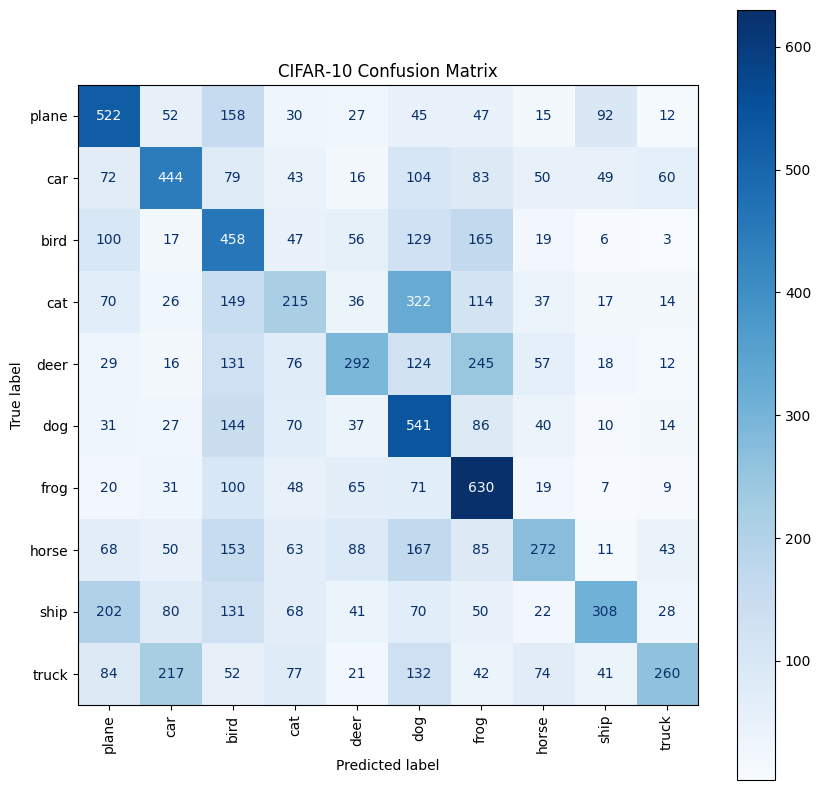

In [ ]:
# Accuracy
print("Accuracy:", accuracy_score(y_true, y_pred))

# Classification report (Precision／Recall／F1)
print("\nClassification Report:\n",
      classification_report(y_true, y_pred, target_names=names, digits=4))

# 混同行列の計算と可視化
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
plt.title("CIFAR‑10 Confusion Matrix")
plt.show()

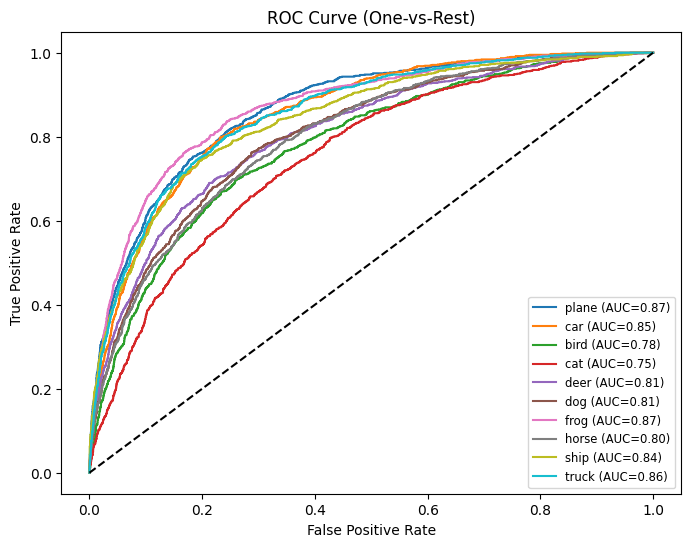

In [ ]:
# y_true を one-hot 表現に変換
y_true_bin = label_binarize(y_true, classes=list(range(10)))

# ROC 曲線・AUC
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_score[:, i])

# プロット
plt.figure(figsize=(8,6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'{names[i]} (AUC={roc_auc[i]:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right', fontsize='small')
plt.show()

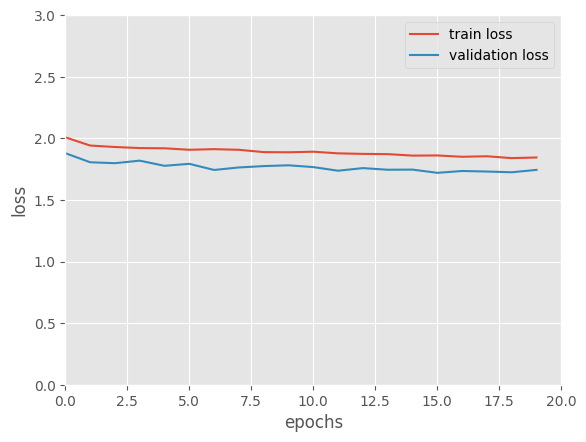

In [ ]:
plt.style.use("ggplot")
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.xlim(0,20)
plt.ylim(0,3)
plt.legend()

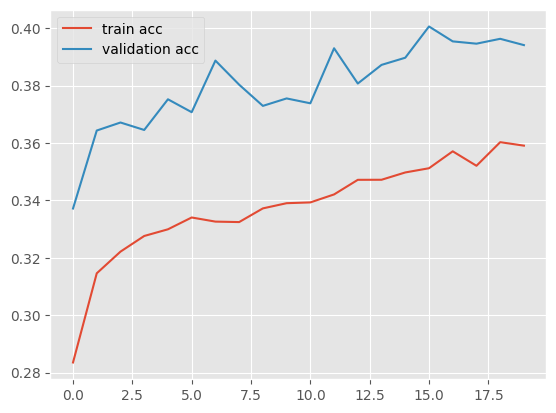

In [ ]:
plt.plot([accs_.cpu() for accs_ in accs], label="train acc")
plt.plot(val_accs, label="validation acc")
plt.legend()